# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, LabelEncoder,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# Visualization Setup
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# 1. Loading Data

In [2]:
!pip install openpyxl

In [3]:
df=pd.read_excel("/content/online_course_recommendation_v2 (3) (1).xlsx")

In [4]:
df.head()

user_id  course_id                       course_name       instructor  \
0    15796       9366              Python for Beginners      Emma Harris   
1      861       1928   Cybersecurity for Professionals  Alexander Young   
2    38159       9541  DevOps and Continuous Deployment   Dr. Mia Walker   
3    44733       3708   Project Management Fundamentals   Benjamin Lewis   
4    11285       3361       Ethical Hacking Masterclass     Daniel White   

   course_duration_hours certification_offered difficulty_level  rating  \
0                   39.1                   Yes         Beginner     5.0   
1                   36.3                   Yes         Beginner     4.3   
2                   13.4                   Yes         Beginner     3.9   
3                   58.3                   Yes         Beginner     3.1   
4                   30.8                   Yes         Beginner     2.8   

   enrollment_numbers  course_price  feedback_score study_material_available  \
0               21600        317.50           0.797                      Yes   
1               15379         40.99           0.770                      Yes   
2                6431        380.81           0.772                      Yes   
3               48245        342.80           0.969                       No   
4               34556        381.01           0.555                      Yes   

   time_spent_hours  previous_courses_taken  
0             17.60                       4  
1             28.97                       9  
2             52.44                       4  
3             22.29                       6  
4             22.01                       5

# 2. EDA

In [5]:
# Checking of missing values --> No missing values in the dataset.
df.isna().sum()

user_id                     0
course_id                   0
course_name                 0
instructor                  0
course_duration_hours       0
certification_offered       0
difficulty_level            0
rating                      0
enrollment_numbers          0
course_price                0
feedback_score              0
study_material_available    0
time_spent_hours            0
previous_courses_taken      0
dtype: int64

In [6]:
# checking for duplicated rows--> No duplicate rows in the dataset.
df.duplicated().sum()

np.int64(0)

In [7]:
df.describe()

user_id      course_id  course_duration_hours         rating  \
count  100000.000000  100000.000000           100000.00000  100000.000000   
mean    24935.663570    5006.863560               52.38354       3.959859   
std     14406.960108    2882.085456               27.42347       0.729958   
min         1.000000       1.000000                5.00000       1.000000   
25%     12487.750000    2523.000000               28.60000       3.500000   
50%     24793.500000    5012.000000               52.40000       4.000000   
75%     37382.250000    7502.000000               76.10000       4.500000   
max     49999.000000    9999.000000              100.00000       5.000000   

       enrollment_numbers   course_price  feedback_score  time_spent_hours  \
count       100000.000000  100000.000000   100000.000000     100000.000000   
mean         25052.822850     261.073369        0.746865         20.691054   
std          14388.188356     139.013758        0.143683         13.669148   
min             50.000000      20.000000        0.092000          1.000000   
25%          12583.750000     140.100000        0.649000          9.900000   
50%          25057.500000     262.310000        0.750000         19.920000   
75%          37522.000000     381.702500        0.851000         30.080000   
max          49999.000000     500.000000        1.000000         84.150000   

       previous_courses_taken  
count           100000.000000  
mean                 4.992670  
std                  2.237259  
min                  0.000000  
25%                  3.000000  
50%                  5.000000  
75%                  6.000000  
max                 19.000000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   user_id                   100000 non-null  int64  
 1   course_id                 100000 non-null  int64  
 2   course_name               100000 non-null  object 
 3   instructor                100000 non-null  object 
 4   course_duration_hours     100000 non-null  float64
 5   certification_offered     100000 non-null  object 
 6   difficulty_level          100000 non-null  object 
 7   rating                    100000 non-null  float64
 8   enrollment_numbers        100000 non-null  int64  
 9   course_price              100000 non-null  float64
 10  feedback_score            100000 non-null  float64
 11  study_material_available  100000 non-null  object 
 12  time_spent_hours          100000 non-null  float64
 13  previous_courses_taken    100000 non-null  in

In [9]:
# Checking Shape of the dataset.--> There are 1,00,000 rows and 14 columns
print(f"Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns")

Dataset shape: 100000 rows, 14 columns


In [10]:
# Checking data types
print("Data Types Summary:")
print(df.dtypes.value_counts())

Data Types Summary:
object     5
float64    5
int64      4
Name: count, dtype: int64


In [11]:
# Unique values from each columns
for col in df.columns:
  print(f"{col} : {df[col].nunique()} unique Values")

user_id : 43242 unique Values
course_id : 9998 unique Values
course_name : 20 unique Values
instructor : 20 unique Values
course_duration_hours : 951 unique Values
certification_offered : 2 unique Values
difficulty_level : 3 unique Values
rating : 41 unique Values
enrollment_numbers : 43085 unique Values
course_price : 41999 unique Values
feedback_score : 780 unique Values
study_material_available : 2 unique Values
time_spent_hours : 5978 unique Values
previous_courses_taken : 19 unique Values


In [12]:
# Numerical Features summary
numerical_cols=df.select_dtypes(include=[np.number]).columns.tolist()
display(df[numerical_cols].describe().T)

count          mean           std     min  \
user_id                 100000.0  24935.663570  14406.960108   1.000   
course_id               100000.0   5006.863560   2882.085456   1.000   
course_duration_hours   100000.0     52.383540     27.423470   5.000   
rating                  100000.0      3.959859      0.729958   1.000   
enrollment_numbers      100000.0  25052.822850  14388.188356  50.000   
course_price            100000.0    261.073369    139.013758  20.000   
feedback_score          100000.0      0.746865      0.143683   0.092   
time_spent_hours        100000.0     20.691054     13.669148   1.000   
previous_courses_taken  100000.0      4.992670      2.237259   0.000   

                              25%       50%         75%       max  
user_id                 12487.750  24793.50  37382.2500  49999.00  
course_id                2523.000   5012.00   7502.0000   9999.00  
course_duration_hours      28.600     52.40     76.1000    100.00  
rating                      3.500      4.00      4.5000      5.00  
enrollment_numbers      12583.750  25057.50  37522.0000  49999.00  
course_price              140.100    262.31    381.7025    500.00  
feedback_score              0.649      0.75      0.8510      1.00  
time_spent_hours            9.900     19.92     30.0800     84.15  
previous_courses_taken      3.000      5.00      6.0000     19.00

In [13]:
# Categorical Features Summary
categorical_cols=df.select_dtypes(include=["object"]).columns.tolist()
for col in categorical_cols:
  print(f"\n{col}:")
  print(df[col].value_counts())
  print(f"Unique Values:{df[col].nunique()}")


course_name:
course_name
Networking and System Administration         5107
Cybersecurity for Professionals              5078
Advanced Machine Learning                    5063
Ethical Hacking Masterclass                  5062
Graphic Design with Canva                    5057
DevOps and Continuous Deployment             5037
Public Speaking Mastery                      5028
Mobile App Development with Swift            5024
Stock Market and Trading Strategies          5022
Data Visualization with Tableau              5010
AI for Business Leaders                      5007
Photography and Video Editing                4995
Project Management Fundamentals              4981
Blockchain and Decentralized Applications    4972
Fundamentals of Digital Marketing            4965
Personal Finance and Wealth Building         4933
Python for Beginners                         4931
Cloud Computing Essentials                   4926
Fitness and Nutrition Coaching               4903
Game Development with Un

In [14]:
numerical_features = ['course_duration_hours', 'rating', 'enrollment_numbers',
                      'course_price', 'feedback_score', 'time_spent_hours',
                      'previous_courses_taken']

### Univariate Analysis For Numerical Features

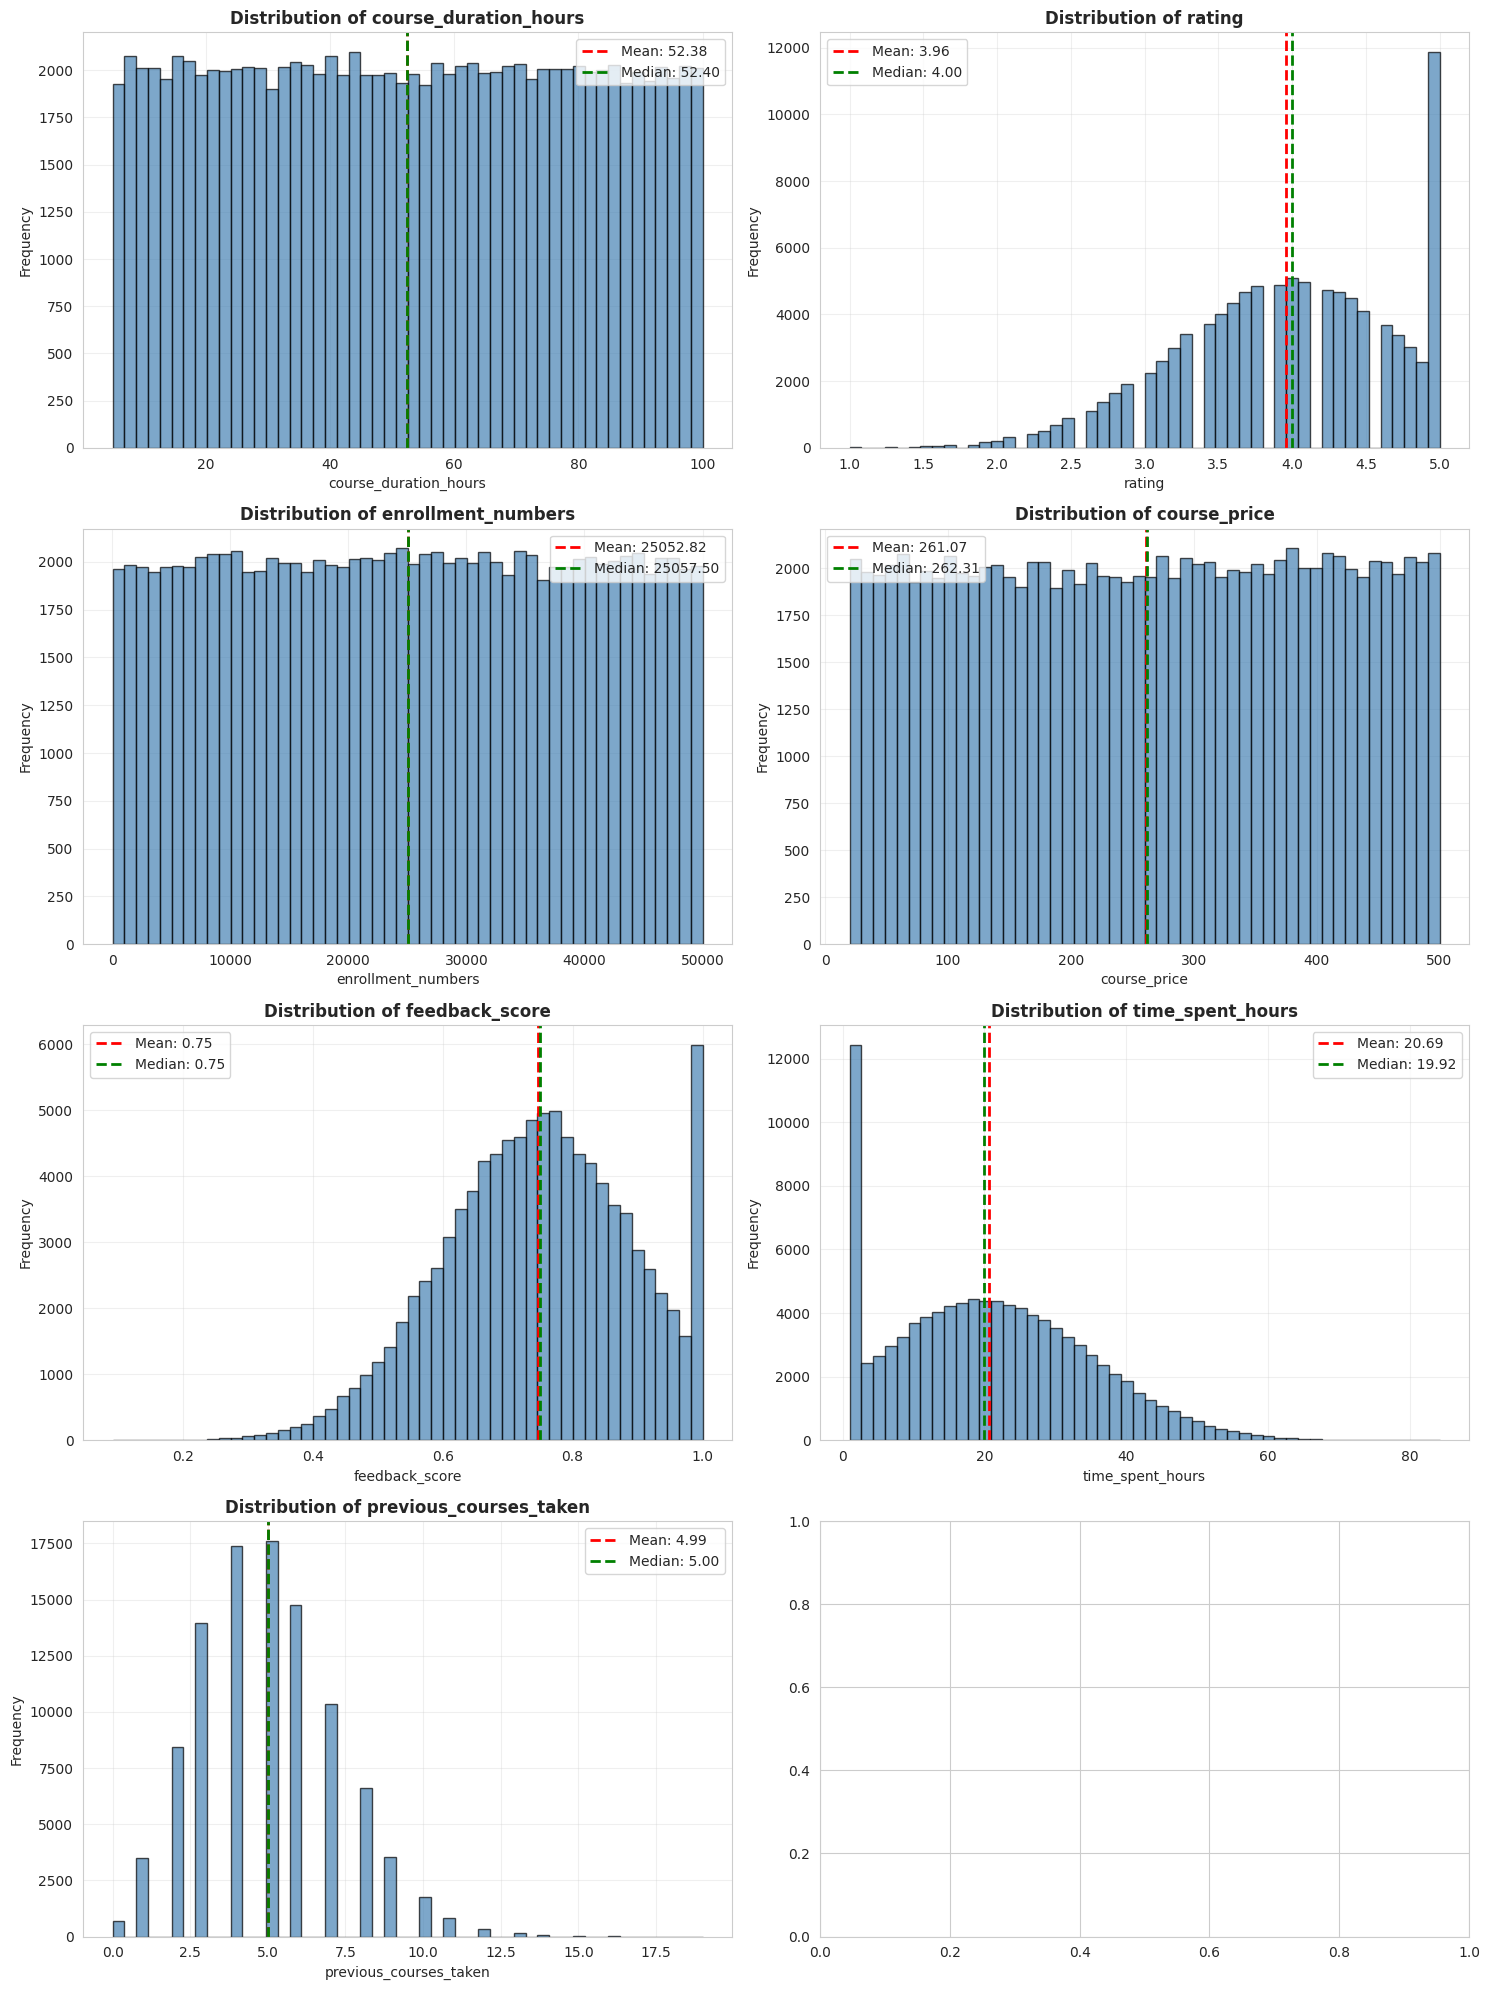

In [15]:
#  Dist Plots for numerical features
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    # Histogram with KDE
    axes[idx].hist(df[col], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

    # Adding mean and median lines for better understanding
    mean_val = df[col].mean()
    median_val = df[col].median()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[idx].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[idx].legend()

plt.tight_layout()
plt.show()

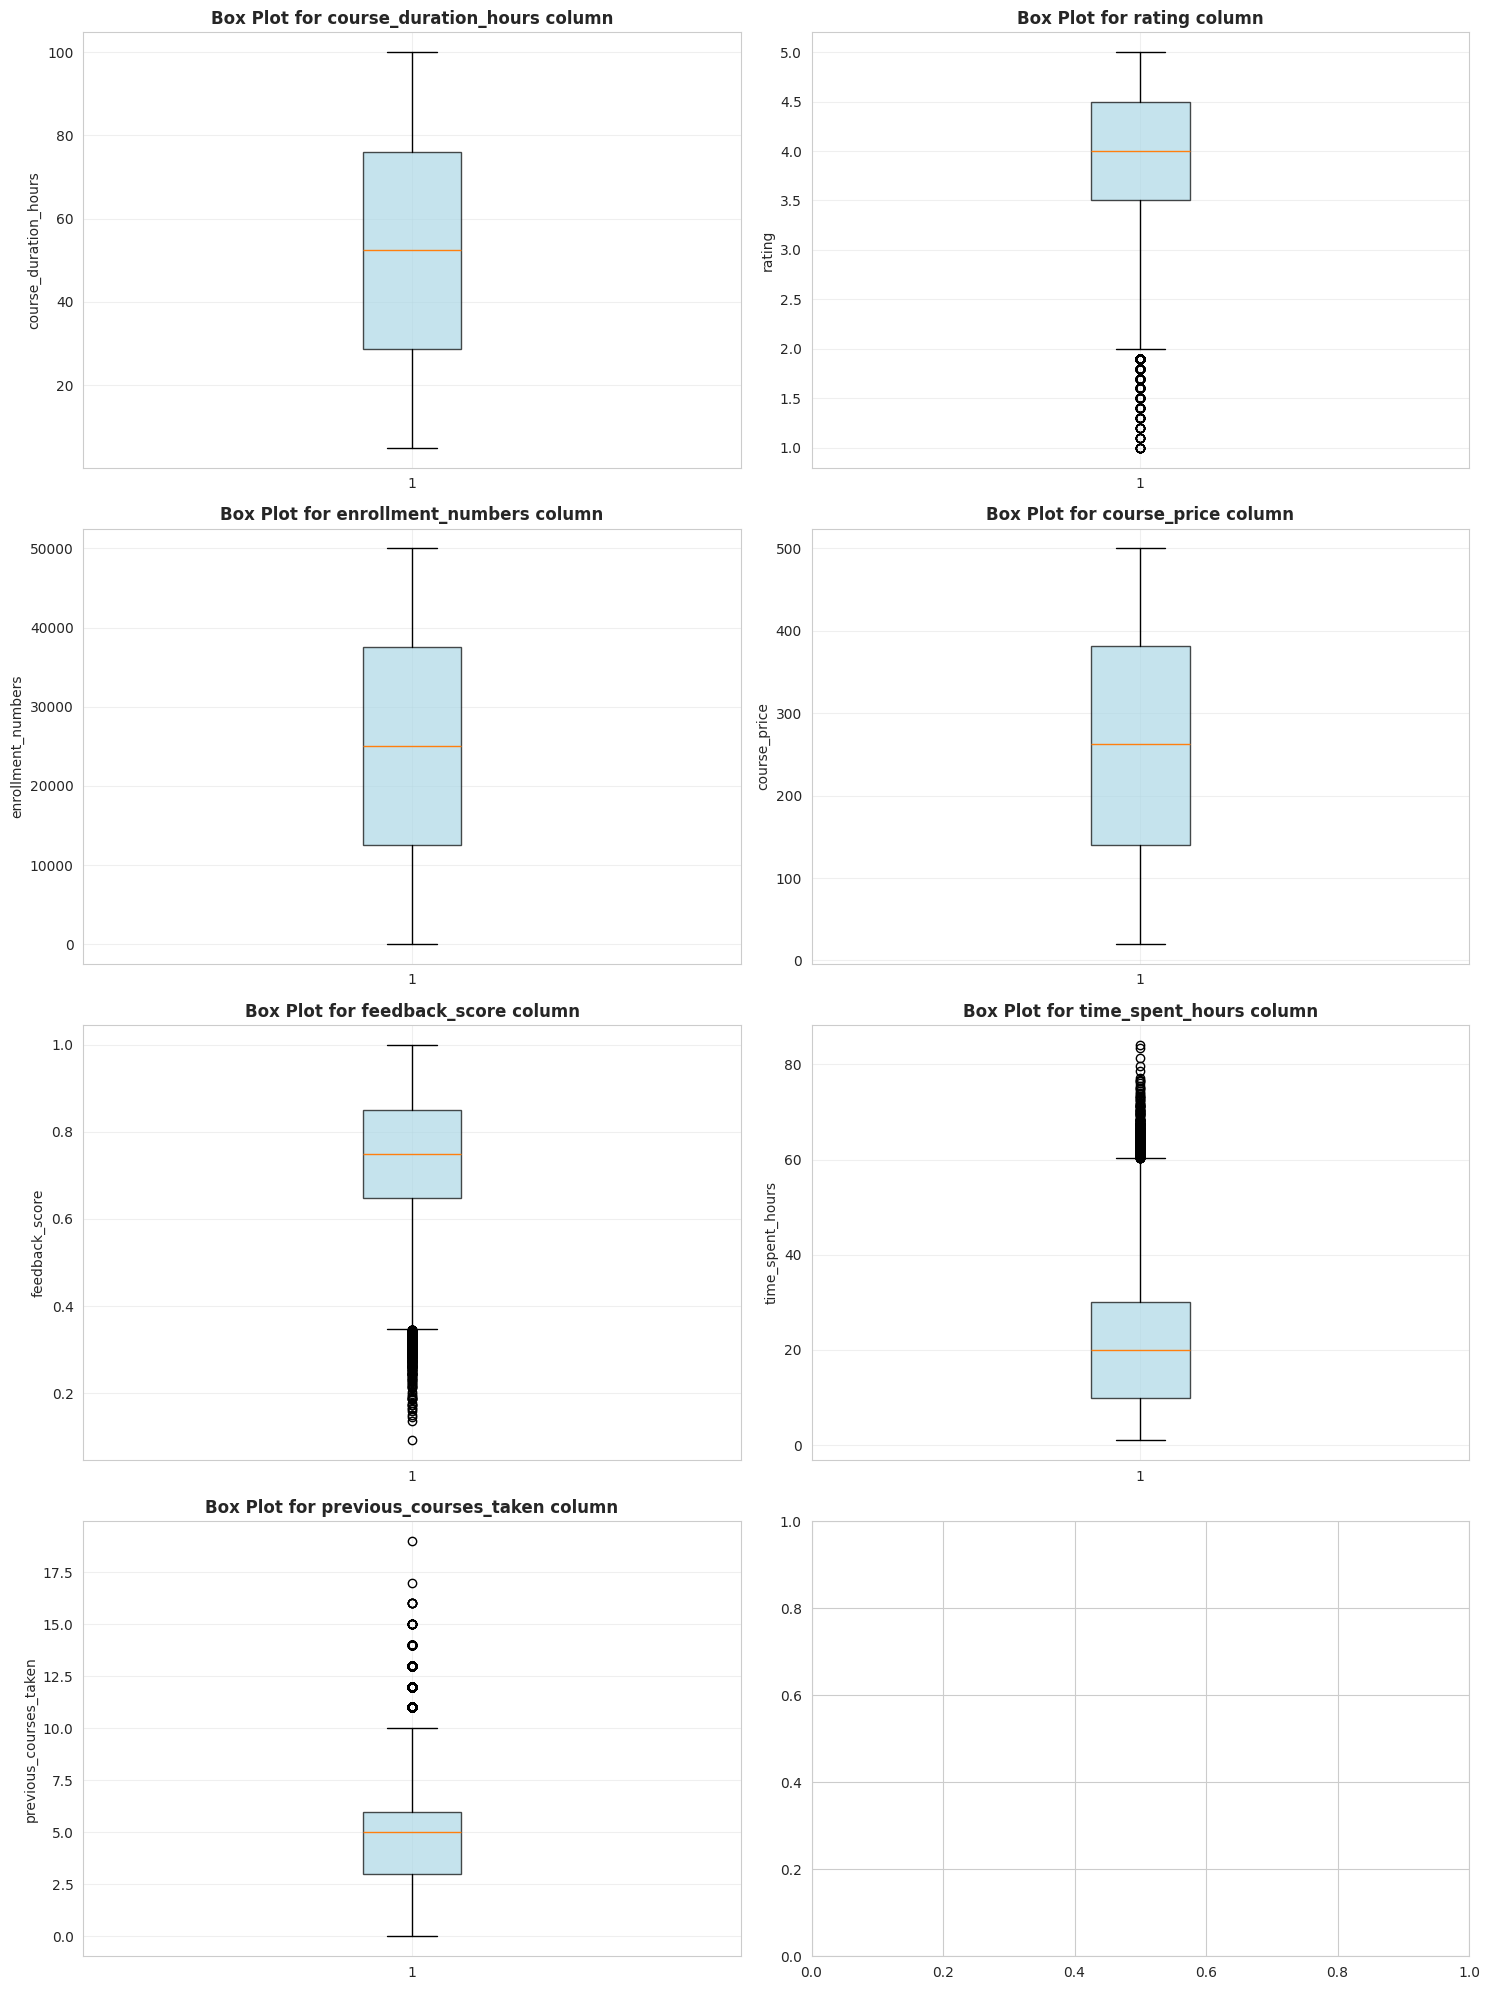

In [16]:
# Box plots for outlier detection
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    axes[idx].boxplot(df[col], vert=True, patch_artist=True,
                      boxprops=dict(facecolor='lightblue', alpha=0.7))
    axes[idx].set_title(f'Box Plot for {col} column', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(col)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [17]:
# Skewness and Kurtosis analysis
print("\nSkewness and Kurtosis Analysis:")
skew_kurt_df = pd.DataFrame({
    'Feature': numerical_features,
    'Skewness': [df[col].skew() for col in numerical_features],
    'Kurtosis': [df[col].kurtosis() for col in numerical_features]
})
print(skew_kurt_df)


Skewness and Kurtosis Analysis:
                  Feature  Skewness  Kurtosis
0   course_duration_hours  0.003957 -1.200790
1                  rating -0.424633 -0.349763
2      enrollment_numbers -0.001392 -1.195687
3            course_price -0.012440 -1.206528
4          feedback_score -0.232178 -0.322079
5        time_spent_hours  0.412810 -0.352988
6  previous_courses_taken  0.442478  0.214430


### Univariate Analysis For Categorical Features

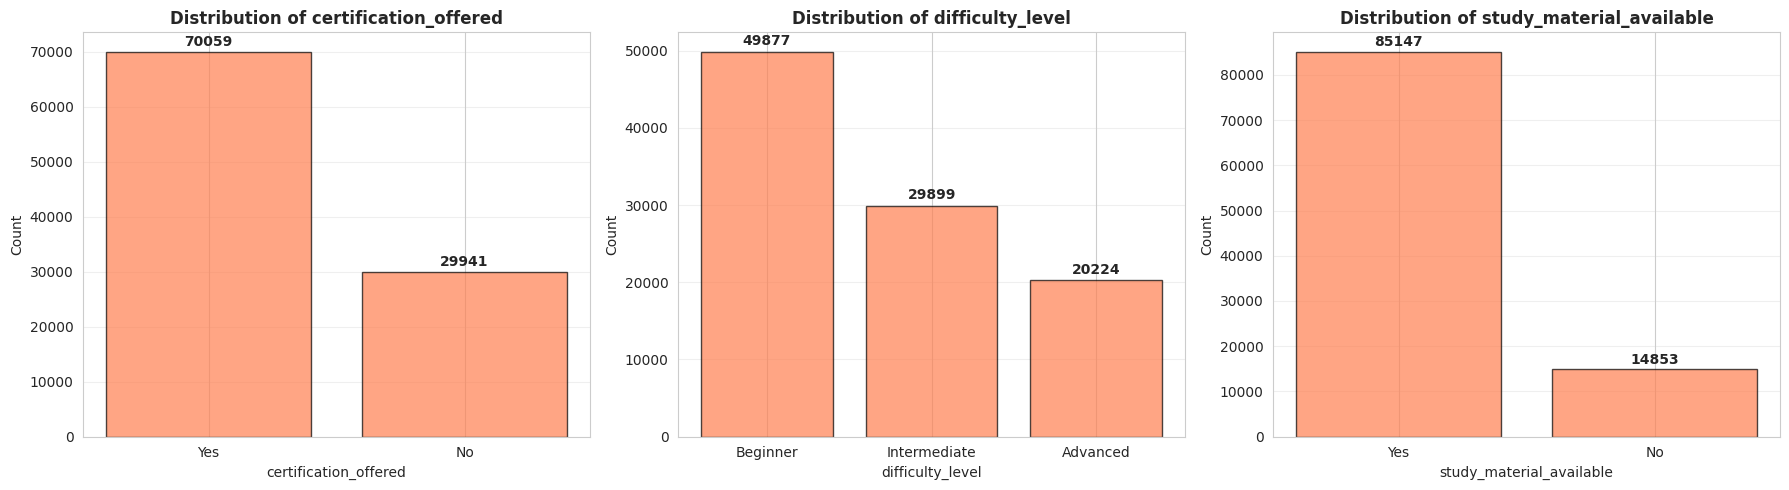

In [18]:
# Bar Plots for categorical features
categorical_features = ['certification_offered','difficulty_level','study_material_available']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, col in enumerate(categorical_features):
    value_counts = df[col].value_counts()
    axes[idx].bar(value_counts.index, value_counts.values, color='coral', alpha=0.7, edgecolor='black')
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')
    axes[idx].grid(True, alpha=0.3, axis='y')

    # Adding value labels on bars
    for i, v in enumerate(value_counts.values):
        axes[idx].text(i, v + 500, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

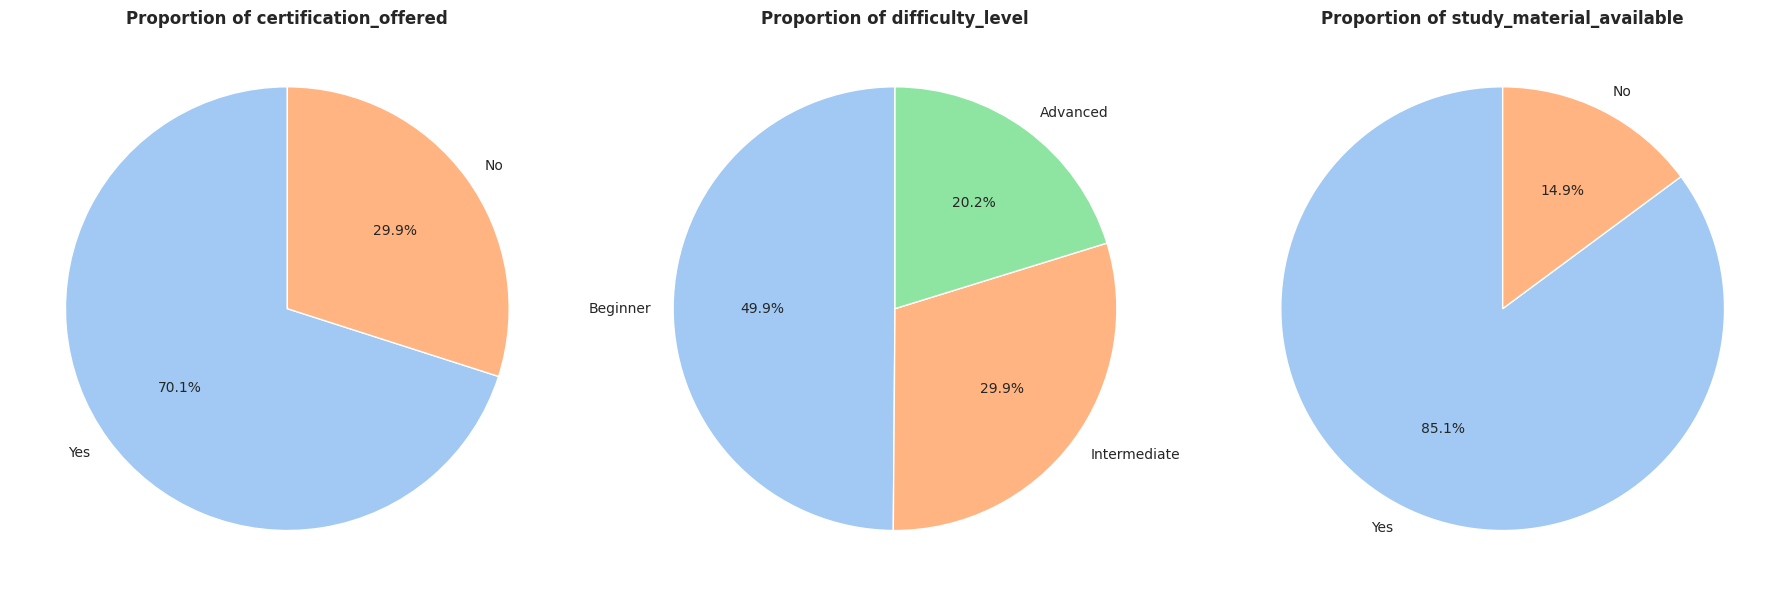

In [19]:
# Pie charts for categorical features
fig, axes = plt.subplots(1, 3, figsize=(18, 8))

for idx, col in enumerate(categorical_features):
    value_counts = df[col].value_counts()
    axes[idx].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%',
                  startangle=90, colors=sns.color_palette('pastel'))
    axes[idx].set_title(f'Proportion of {col}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

### Bivariate Analysis

In [20]:
# Correlation matrix for numerical features
print("\nCorrelation Matrix:")
correlation_matrix = df[numerical_features].corr()
display(correlation_matrix)


Correlation Matrix:


course_duration_hours    rating  enrollment_numbers  \
course_duration_hours                1.000000  0.001650           -0.000591   
rating                               0.001650  1.000000           -0.001110   
enrollment_numbers                  -0.000591 -0.001110            1.000000   
course_price                         0.002784 -0.001431            0.000441   
feedback_score                       0.001806  0.001477            0.001707   
time_spent_hours                    -0.001776  0.002027            0.000402   
previous_courses_taken              -0.002122  0.000579            0.000049   

                        course_price  feedback_score  time_spent_hours  \
course_duration_hours       0.002784        0.001806         -0.001776   
rating                     -0.001431        0.001477          0.002027   
enrollment_numbers          0.000441        0.001707          0.000402   
course_price                1.000000        0.004129         -0.002841   
feedback_score              0.004129        1.000000          0.000667   
time_spent_hours           -0.002841        0.000667          1.000000   
previous_courses_taken      0.000842       -0.001546          0.002991   

                        previous_courses_taken  
course_duration_hours                -0.002122  
rating                                0.000579  
enrollment_numbers                    0.000049  
course_price                          0.000842  
feedback_score                       -0.001546  
time_spent_hours                      0.002991  
previous_courses_taken                1.000000

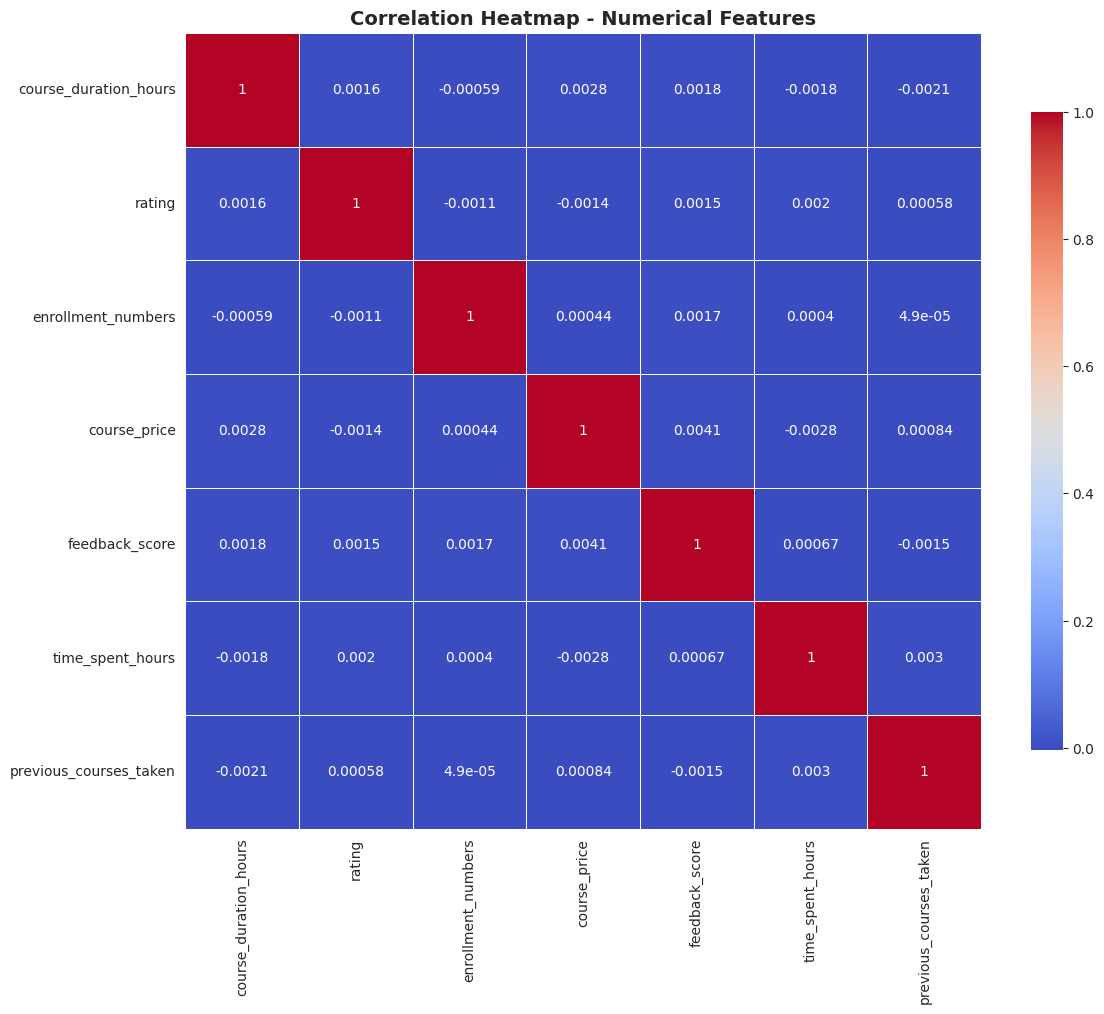

In [21]:
# Heatmap visualization
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

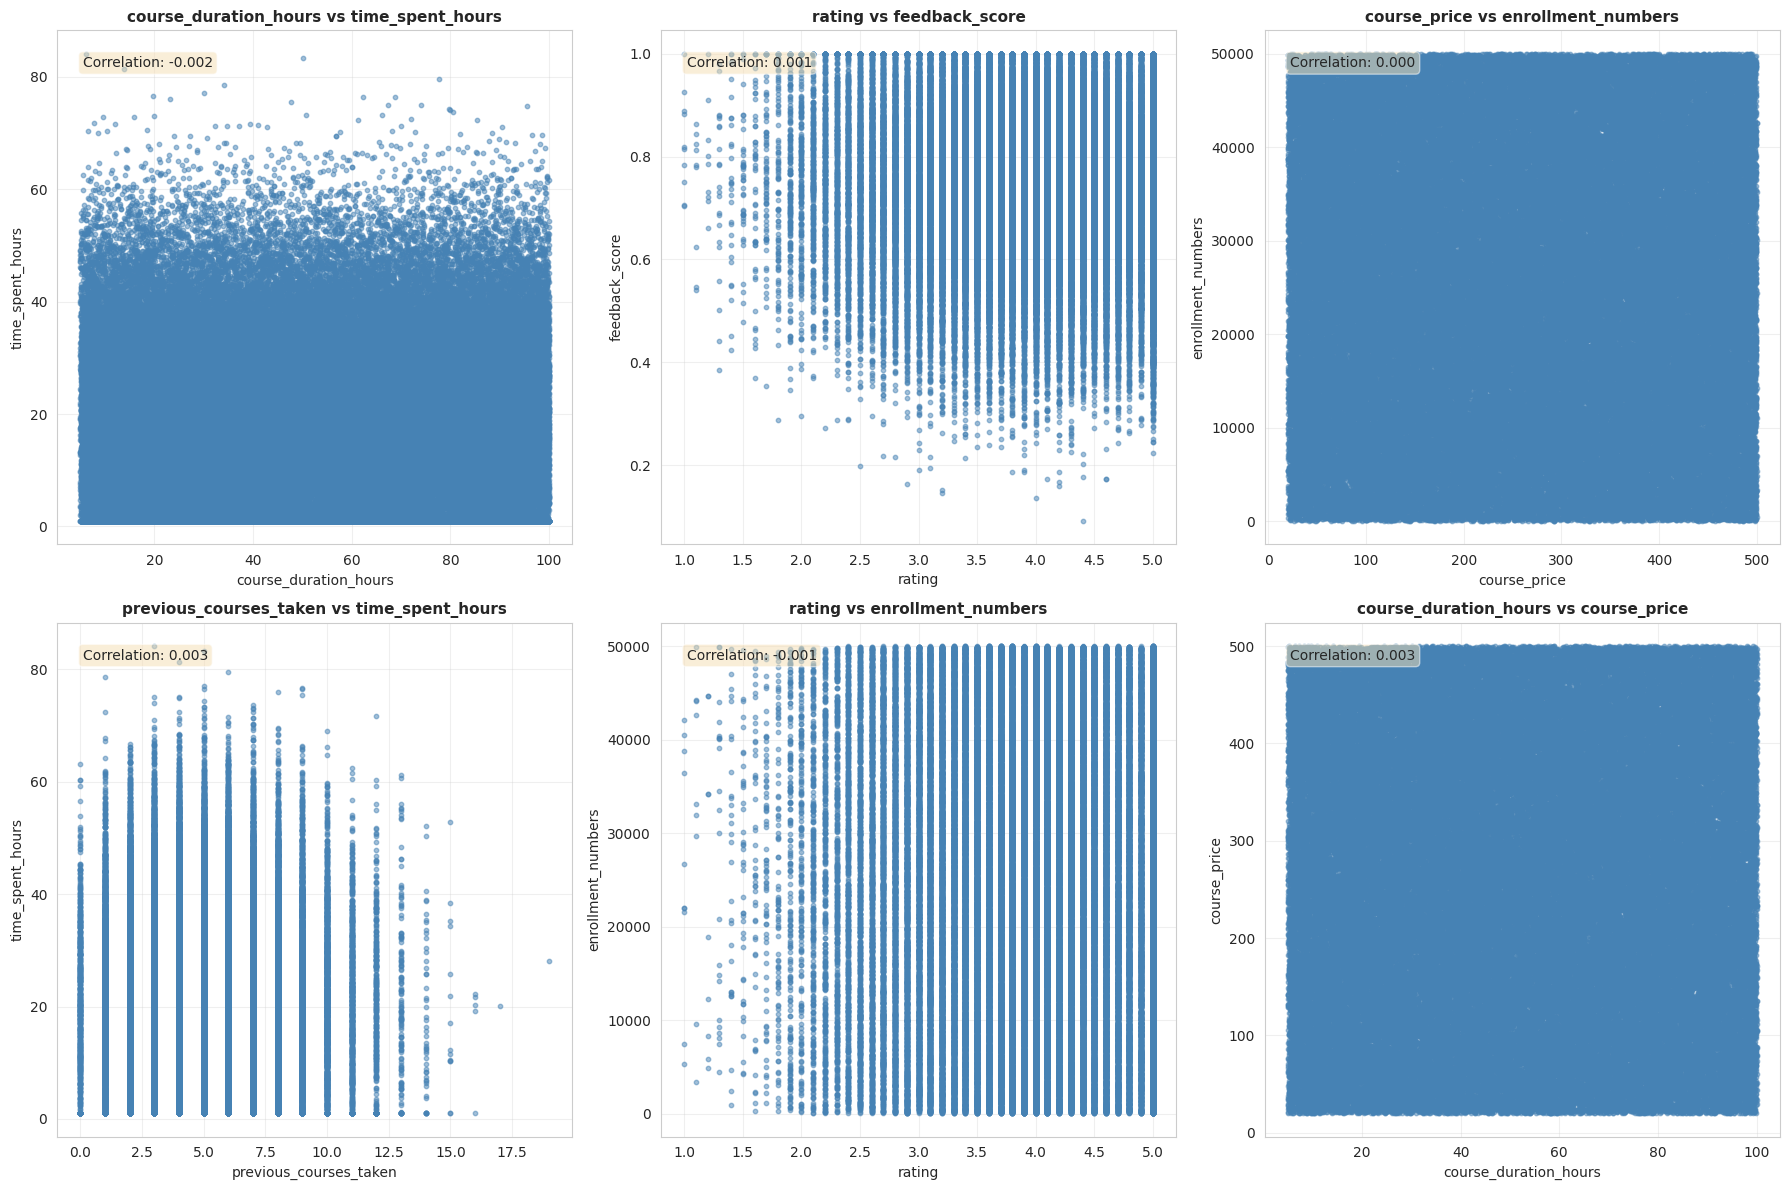

In [22]:
# Scatter plots for key relationships
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

scatter_pairs = [
    ('course_duration_hours', 'time_spent_hours'),
    ('rating', 'feedback_score'),
    ('course_price', 'enrollment_numbers'),
    ('previous_courses_taken', 'time_spent_hours'),
    ('rating', 'enrollment_numbers'),
    ('course_duration_hours', 'course_price')
]

for idx, (x_col, y_col) in enumerate(scatter_pairs):
    axes[idx].scatter(df[x_col], df[y_col], alpha=0.5, s=10, color='steelblue')
    axes[idx].set_xlabel(x_col, fontsize=10)
    axes[idx].set_ylabel(y_col, fontsize=10)
    axes[idx].set_title(f'{x_col} vs {y_col}', fontsize=11, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)

    # Adding correlation coefficient
    corr = df[[x_col, y_col]].corr().iloc[0, 1]
    axes[idx].text(0.05, 0.95, f'Correlation: {corr:.3f}',
                   transform=axes[idx].transAxes, fontsize=10,
                   verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

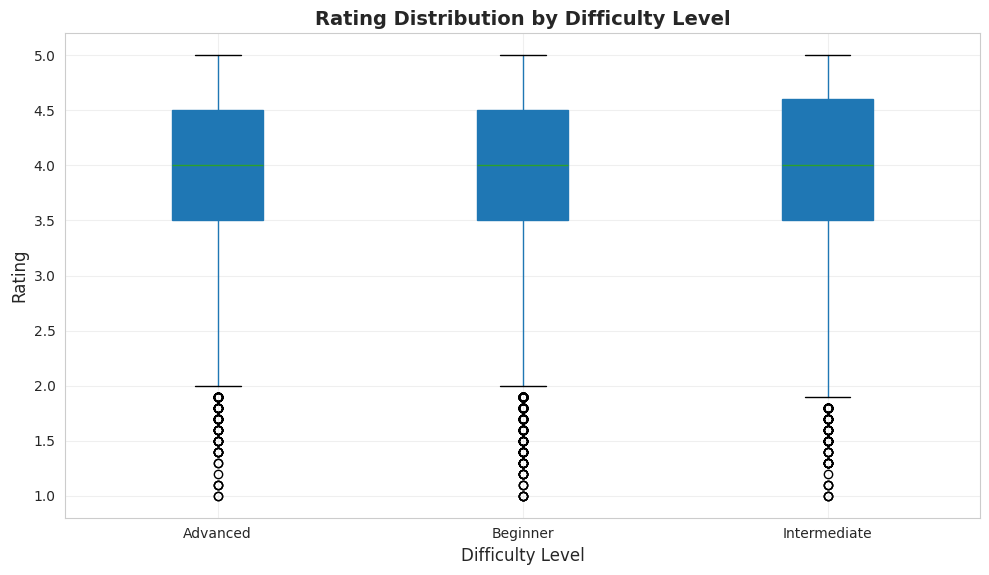

In [23]:
# Rating by difficulty level
plt.figure(figsize=(10, 6))
df.boxplot(column='rating', by='difficulty_level', ax=plt.gca(), patch_artist=True)
plt.title('Rating Distribution by Difficulty Level', fontsize=14, fontweight='bold')
plt.suptitle('')
plt.xlabel('Difficulty Level', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

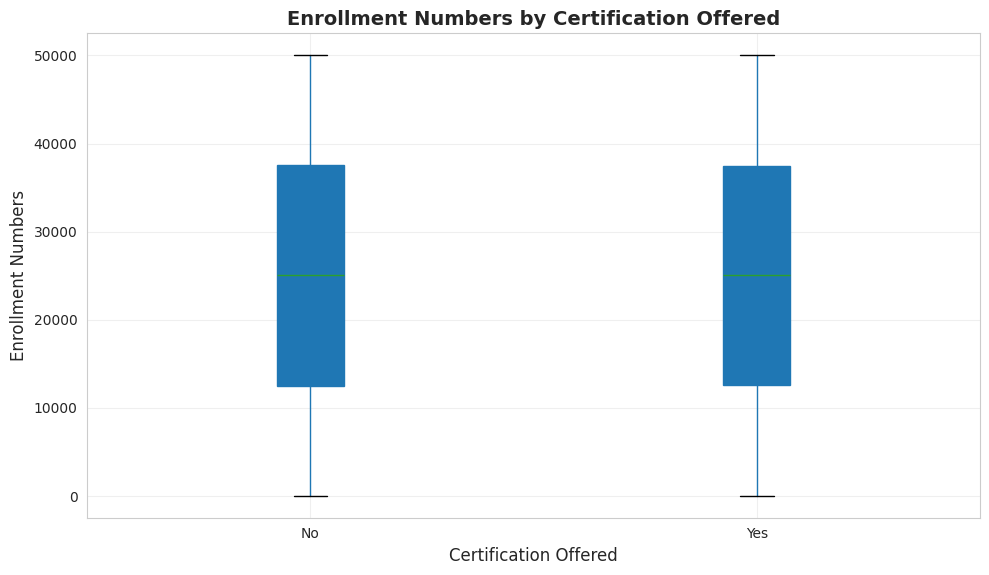

In [24]:
# Enrollment by certification offered
plt.figure(figsize=(10, 6))
df.boxplot(column='enrollment_numbers', by='certification_offered', ax=plt.gca(), patch_artist=True)
plt.title('Enrollment Numbers by Certification Offered', fontsize=14, fontweight='bold')
plt.suptitle('')
plt.xlabel('Certification Offered', fontsize=12)
plt.ylabel('Enrollment Numbers', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


 ### MULTIVARIATE ANALYSIS

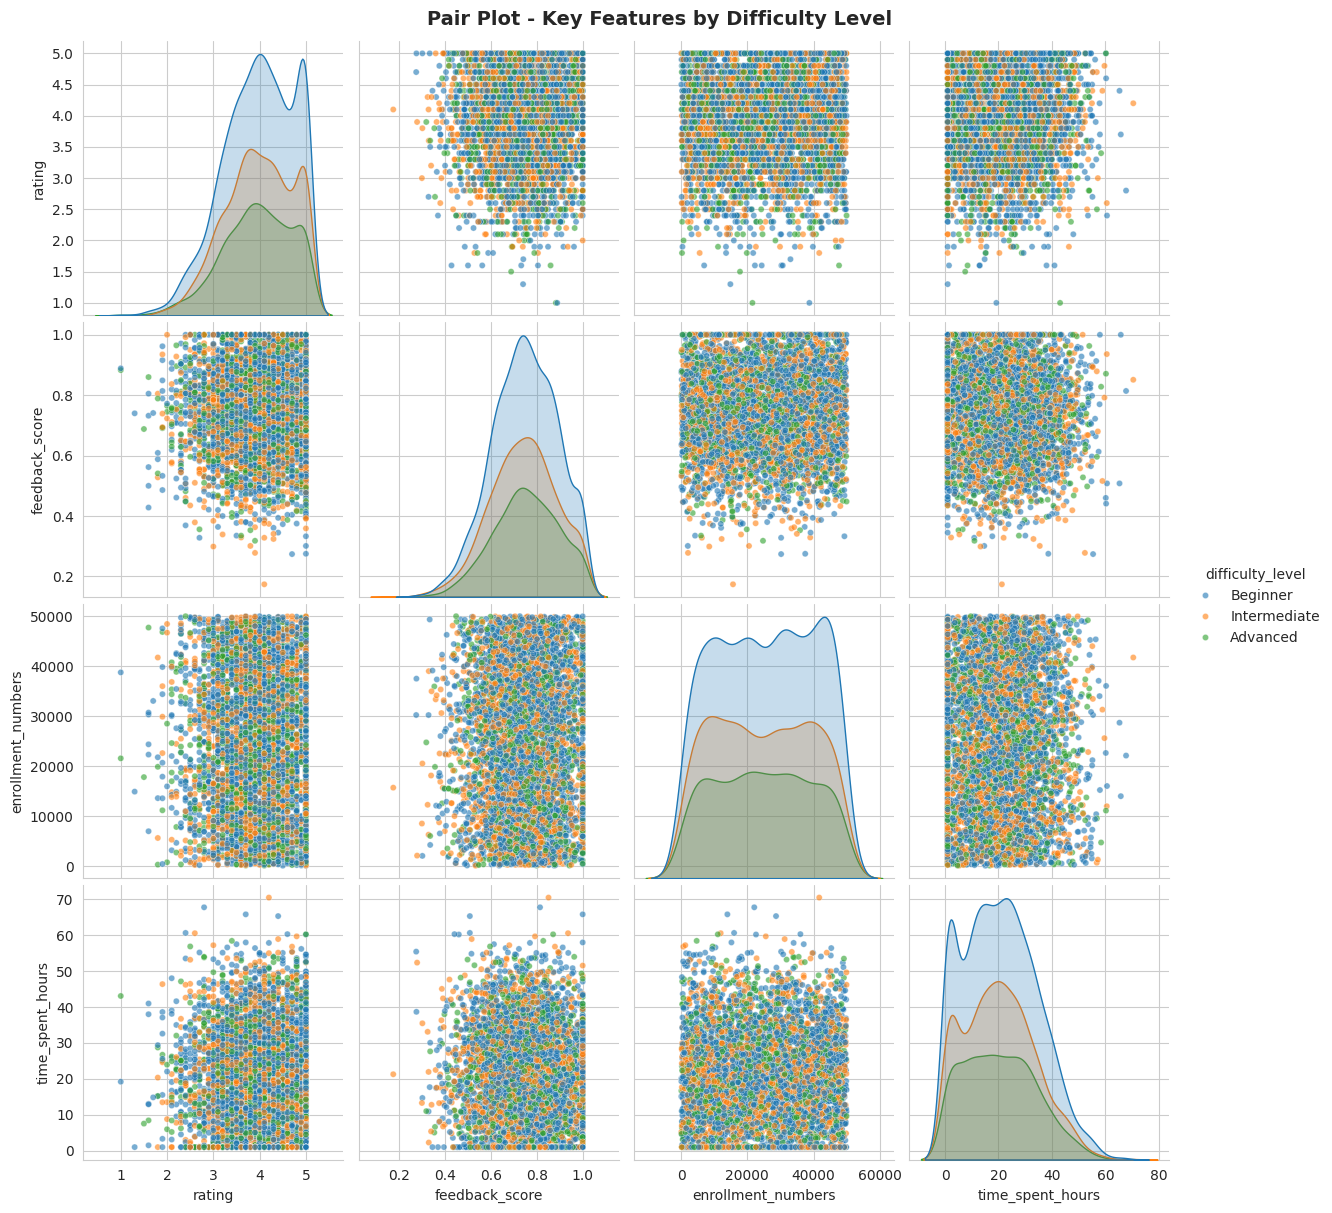

In [25]:
# Pair plot for selected features
selected_features = ['rating', 'feedback_score', 'enrollment_numbers', 'time_spent_hours']
pairplot_df = df[selected_features + ['difficulty_level']].sample(5000)  # Sample for performance

sns.pairplot(pairplot_df, hue='difficulty_level', diag_kind='kde',
             plot_kws={'alpha': 0.6, 's': 20}, height=3)
plt.suptitle('Pair Plot - Key Features by Difficulty Level', y=1.01, fontsize=14, fontweight='bold')
plt.show()

### Group analysis - Average metrics by difficulty level

In [26]:
difficulty_stats = df.groupby('difficulty_level')[numerical_features].mean()
display(difficulty_stats)

course_duration_hours    rating  enrollment_numbers  \
difficulty_level                                                        
Advanced                      52.262994  3.956754        24857.011125   
Beginner                      52.422072  3.957309        25079.551697   
Intermediate                  52.400799  3.966213        25140.683367   

                  course_price  feedback_score  time_spent_hours  \
difficulty_level                                                   
Advanced            262.153269        0.745291         20.712972   
Beginner            260.878816        0.747191         20.692201   
Intermediate        260.667463        0.747385         20.674316   

                  previous_courses_taken  
difficulty_level                          
Advanced                        4.981804  
Beginner                        5.003128  
Intermediate                    4.982575

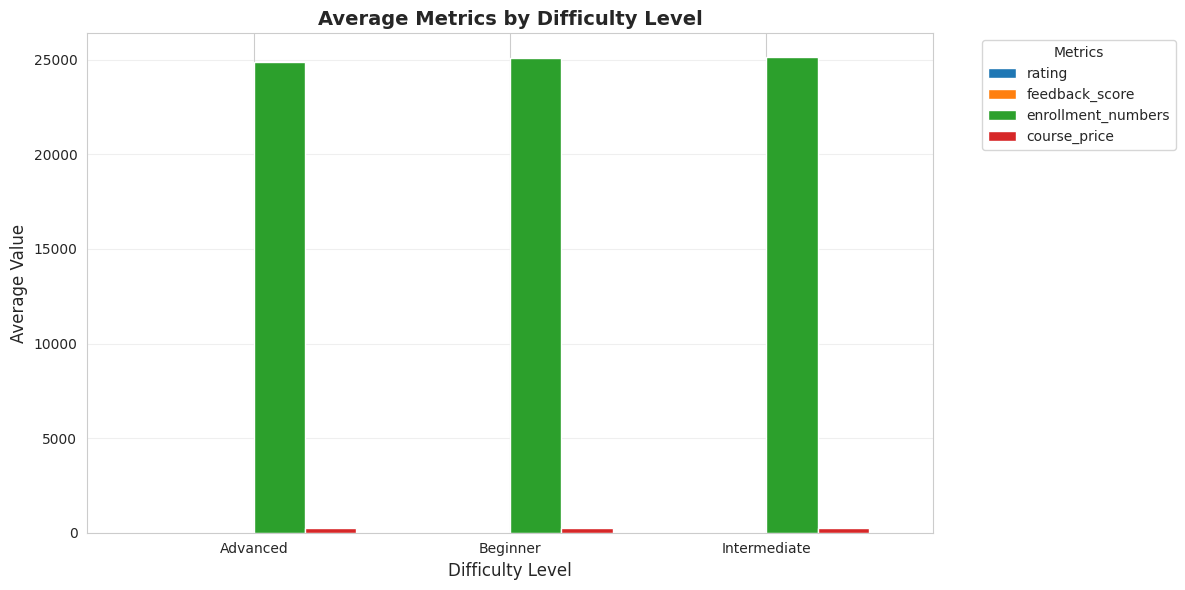

In [27]:
# Visualization of group statistics
difficulty_stats_plot = difficulty_stats[['rating', 'feedback_score', 'enrollment_numbers', 'course_price']]
difficulty_stats_plot.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title('Average Metrics by Difficulty Level', fontsize=14, fontweight='bold')
plt.xlabel('Difficulty Level', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

### OUTLIER DETECTION AND ANALYSIS

In [28]:
# IQR method for outlier detection
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

print("\n Outlier Detection using IQR Method:")
outlier_summary = []
for col in numerical_features:
    num_outliers, lower, upper = detect_outliers_iqr(df, col)
    outlier_summary.append({
        'Feature': col,
        'Num_Outliers': num_outliers,
        'Outlier_Percentage': f"{(num_outliers/len(df))*100:.2f}%",
        'Lower_Bound': f"{lower:.2f}",
        'Upper_Bound': f"{upper:.2f}"
    })

outlier_df = pd.DataFrame(outlier_summary)
display(outlier_df)


 Outlier Detection using IQR Method:


Feature  Num_Outliers Outlier_Percentage Lower_Bound  \
0   course_duration_hours             0              0.00%      -42.65   
1                  rating           529              0.53%        2.00   
2      enrollment_numbers             0              0.00%   -24823.62   
3            course_price             0              0.00%     -222.30   
4          feedback_score           377              0.38%        0.35   
5        time_spent_hours           342              0.34%      -20.37   
6  previous_courses_taken          1373              1.37%       -1.50   

  Upper_Bound  
0      147.35  
1        6.00  
2    74929.38  
3      744.11  
4        1.15  
5       60.35  
6       10.50

In [29]:
df

user_id  course_id                           course_name  \
0        15796       9366                  Python for Beginners   
1          861       1928       Cybersecurity for Professionals   
2        38159       9541      DevOps and Continuous Deployment   
3        44733       3708       Project Management Fundamentals   
4        11285       3361           Ethical Hacking Masterclass   
...        ...        ...                                   ...   
99995    10647       5466             Graphic Design with Canva   
99996    13800       2623   Stock Market and Trading Strategies   
99997    47131       1556  Networking and System Administration   
99998    49654       6001             Graphic Design with Canva   
99999    12929       5763             Graphic Design with Canva   

            instructor  course_duration_hours certification_offered  \
0          Emma Harris                   39.1                   Yes   
1      Alexander Young                   36.3                   Yes   
2       Dr. Mia Walker                   13.4                   Yes   
3       Benjamin Lewis                   58.3                   Yes   
4         Daniel White                   30.8                   Yes   
...                ...                    ...                   ...   
99995      Emma Harris                   17.3                   Yes   
99996   Dr. John Smith                   68.4                   Yes   
99997   Dr. John Smith                   73.8                   Yes   
99998     Daniel White                   30.3                   Yes   
99999     Daniel White                   67.0                    No   

      difficulty_level  rating  enrollment_numbers  course_price  \
0             Beginner     5.0               21600        317.50   
1             Beginner     4.3               15379         40.99   
2             Beginner     3.9                6431        380.81   
3             Beginner     3.1               48245        342.80   
4             Beginner     2.8               34556        381.01   
...                ...     ...                 ...           ...   
99995         Beginner     3.9               49101        485.34   
99996         Beginner     3.5               35107        162.80   
99997         Beginner     4.3               12146         24.02   
99998         Beginner     3.5                9933        402.24   
99999         Beginner     2.3                3479        135.61   

       feedback_score study_material_available  time_spent_hours  \
0               0.797                      Yes             17.60   
1               0.770                      Yes             28.97   
2               0.772                      Yes             52.44   
3               0.969                       No             22.29   
4               0.555                      Yes             22.01   
...               ...                      ...               ...   
99995           0.838                      Yes             16.35   
99996           0.922                      Yes             41.94   
99997           0.990                      Yes             15.87   
99998           0.630                      Yes             21.05   
99999           0.753                      Yes              8.63   

       previous_courses_taken  
0                           4  
1                           9  
2                           4  
3                           6  
4                           5  
...                       ...  
99995                       3  
99996                       7  
99997                       5  
99998                       4  
99999                       1  

[100000 rows x 14 columns]

In [30]:
# Z-score method
print("Outlier Detection using Z-Score Method (|z| > 3):")
z_scores = np.abs(stats.zscore(df[numerical_features]))
outliers_zscore = (z_scores > 3).sum(axis=0)
print(pd.DataFrame({'Feature': numerical_features, 'Num_Outliers': outliers_zscore}))

Outlier Detection using Z-Score Method (|z| > 3):
                  Feature  Num_Outliers
0   course_duration_hours             0
1                  rating           245
2      enrollment_numbers             0
3            course_price             0
4          feedback_score           201
5        time_spent_hours           255
6  previous_courses_taken           557


### DATA PREPROCESSING

In [31]:
df_processed = df.copy()

In [32]:
# Handling outliers (Optional - using capping method)
print("Handling Outliers (Capping Method)")
for col in numerical_features:
    Q1 = df_processed[col].quantile(0.25)
    Q3 = df_processed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers
    df_processed[col] = df_processed[col].clip(lower=lower_bound, upper=upper_bound)


Handling Outliers (Capping Method)


### Encode categorical variables

In [33]:
# Label Encoding for binary categorical variables
label_encoders = {}
binary_cats = ['certification_offered', 'study_material_available']

for col in binary_cats:
    le = LabelEncoder()
    df_processed[col + '_encoded'] = le.fit_transform(df_processed[col])
    label_encoders[col] = le
    print(f"  {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

  certification_offered: {'No': np.int64(0), 'Yes': np.int64(1)}
  study_material_available: {'No': np.int64(0), 'Yes': np.int64(1)}


In [34]:
from sklearn.preprocessing import OrdinalEncoder

# Initialize the encoder with specific order
encoder = OrdinalEncoder(categories=[['Beginner', 'Intermediate', 'Advanced']])

# Fit and transform (reshaping to 2D array is required by sklearn)
df_processed['difficulty_level_encoded'] = encoder.fit_transform(df_processed[['difficulty_level']])

# Check the result
print(df_processed[['difficulty_level', 'difficulty_level_encoded']].sample(10))

      difficulty_level  difficulty_level_encoded
55326         Advanced                       2.0
19751         Beginner                       0.0
16619         Advanced                       2.0
64307         Beginner                       0.0
88887         Beginner                       0.0
2819      Intermediate                       1.0
53149         Advanced                       2.0
69883         Beginner                       0.0
60890         Beginner                       0.0
55024         Advanced                       2.0


In [35]:
df_processed

user_id  course_id                           course_name  \
0        15796       9366                  Python for Beginners   
1          861       1928       Cybersecurity for Professionals   
2        38159       9541      DevOps and Continuous Deployment   
3        44733       3708       Project Management Fundamentals   
4        11285       3361           Ethical Hacking Masterclass   
...        ...        ...                                   ...   
99995    10647       5466             Graphic Design with Canva   
99996    13800       2623   Stock Market and Trading Strategies   
99997    47131       1556  Networking and System Administration   
99998    49654       6001             Graphic Design with Canva   
99999    12929       5763             Graphic Design with Canva   

            instructor  course_duration_hours certification_offered  \
0          Emma Harris                   39.1                   Yes   
1      Alexander Young                   36.3                   Yes   
2       Dr. Mia Walker                   13.4                   Yes   
3       Benjamin Lewis                   58.3                   Yes   
4         Daniel White                   30.8                   Yes   
...                ...                    ...                   ...   
99995      Emma Harris                   17.3                   Yes   
99996   Dr. John Smith                   68.4                   Yes   
99997   Dr. John Smith                   73.8                   Yes   
99998     Daniel White                   30.3                   Yes   
99999     Daniel White                   67.0                    No   

      difficulty_level  rating  enrollment_numbers  course_price  \
0             Beginner     5.0               21600        317.50   
1             Beginner     4.3               15379         40.99   
2             Beginner     3.9                6431        380.81   
3             Beginner     3.1               48245        342.80   
4             Beginner     2.8               34556        381.01   
...                ...     ...                 ...           ...   
99995         Beginner     3.9               49101        485.34   
99996         Beginner     3.5               35107        162.80   
99997         Beginner     4.3               12146         24.02   
99998         Beginner     3.5                9933        402.24   
99999         Beginner     2.3                3479        135.61   

       feedback_score study_material_available  time_spent_hours  \
0               0.797                      Yes             17.60   
1               0.770                      Yes             28.97   
2               0.772                      Yes             52.44   
3               0.969                       No             22.29   
4               0.555                      Yes             22.01   
...               ...                      ...               ...   
99995           0.838                      Yes             16.35   
99996           0.922                      Yes             41.94   
99997           0.990                      Yes             15.87   
99998           0.630                      Yes             21.05   
99999           0.753                      Yes              8.63   

       previous_courses_taken  certification_offered_encoded  \
0                         4.0                              1   
1                         9.0                              1   
2                         4.0                              1   
3                         6.0                              1   
4                         5.0                              1   
...                       ...                            ...   
99995                     3.0                              1   
99996                     7.0                              1   
99997                     5.0                              1   
99998                     4.0                              1   
99999      

In [36]:
df_processed["difficulty_level_encoded"].value_counts()

difficulty_level_encoded
0.0    49877
1.0    29899
2.0    20224
Name: count, dtype: int64

In [37]:
df_processed["difficulty_level"].value_counts()

difficulty_level
Beginner        49877
Intermediate    29899
Advanced        20224
Name: count, dtype: int64

### Feature Scaling

In [38]:
# Selecting numerical features for scaling
numerical_features_to_scale = ['course_duration_hours', 'rating', 'enrollment_numbers',
                               'course_price', 'feedback_score', 'time_spent_hours',
                               'previous_courses_taken']

# StandardScaler (z-score normalization)
scaler_standard = StandardScaler()
df_processed[['scaled_' + col for col in numerical_features_to_scale]] = \
    scaler_standard.fit_transform(df_processed[numerical_features_to_scale])

# MinMaxScaler (0-1 normalization)
scaler_minmax = MinMaxScaler()
df_processed[['normalized_' + col for col in numerical_features_to_scale]] = \
    scaler_minmax.fit_transform(df_processed[numerical_features_to_scale])

print("Feature scaling completed")
print(f"  - StandardScaler applied (z-score normalization)")
print(f"  - MinMaxScaler applied (0-1 normalization)")

# Display processed dataset info
print(" Processed Dataset Shape:", df_processed.shape)
print("New columns created:", [col for col in df_processed.columns if col not in df.columns])


Feature scaling completed
  - StandardScaler applied (z-score normalization)
  - MinMaxScaler applied (0-1 normalization)
 Processed Dataset Shape: (100000, 31)
New columns created: ['certification_offered_encoded', 'study_material_available_encoded', 'difficulty_level_encoded', 'scaled_course_duration_hours', 'scaled_rating', 'scaled_enrollment_numbers', 'scaled_course_price', 'scaled_feedback_score', 'scaled_time_spent_hours', 'scaled_previous_courses_taken', 'normalized_course_duration_hours', 'normalized_rating', 'normalized_enrollment_numbers', 'normalized_course_price', 'normalized_feedback_score', 'normalized_time_spent_hours', 'normalized_previous_courses_taken']


### FEATURE ENGINEERING

#### Creating New Features

* Engagement score (combination of time spent and rating)

In [39]:
df_processed["engagement_score"]= (df_processed["time_spent_hours"]/df_processed["course_duration_hours"])* df_processed['rating']

* Price per hour

In [40]:
df_processed["price_per_hour"]= df_processed["course_price"]/df_processed["course_duration_hours"]

* Course popularity (normalized enrollment)

In [41]:
df_processed["popularity_score"]=(df_processed['enrollment_numbers'] - df_processed['enrollment_numbers'].min()) / \
                                   (df_processed['enrollment_numbers'].max() - df_processed['enrollment_numbers'].min())

* Quality indicator (rating + feedback score)

In [42]:
df_processed["quality_indicator"]=(df_processed["rating"]+df_processed["feedback_score"]/2)

* Completion ratio (time spent / course duration)

In [43]:
df_processed["completion_ratio"]=df_processed["time_spent_hours"]/df_processed["course_duration_hours"]

* Experience level (based on previous courses)

In [44]:
df_processed['experience_level'] = pd.cut(df_processed['previous_courses_taken'],
                                          bins=[-1, 2, 5, 10, 20],
                                          labels=['Beginner', 'Intermediate', 'Advanced', 'Expert'])

* Value for money (rating / price)

In [45]:
df_processed['value_for_money'] = df_processed['rating'] / (df_processed['course_price'] + 1)  # +1 to avoid division by zero


In [46]:
new_features = ['engagement_score', 'price_per_hour', 'popularity_score',
                'quality_indicator', 'completion_ratio', 'experience_level', 'value_for_money']
for feature in new_features:
    print(f"  - {feature}")

  - engagement_score
  - price_per_hour
  - popularity_score
  - quality_indicator
  - completion_ratio
  - experience_level
  - value_for_money


#### Statistical features

In [47]:
# User-level aggregations
user_stats = df_processed.groupby('user_id').agg({
    'rating': ['mean', 'std', 'count'],
    'time_spent_hours': ['mean', 'sum'],
    'course_price': 'mean'
}).reset_index()

user_stats.columns = ['user_id', 'user_avg_rating', 'user_rating_std', 'user_course_count',
                      'user_avg_time', 'user_total_time', 'user_avg_price']

df_processed = df_processed.merge(user_stats, on='user_id', how='left')

In [48]:
# Course-level aggregations
course_stats = df_processed.groupby('course_id').agg({
    'rating': ['mean', 'count'],
    'enrollment_numbers': 'mean',
    'feedback_score': 'mean'
}).reset_index()

course_stats.columns = ['course_id', 'course_avg_rating', 'course_rating_count',
                        'course_avg_enrollment', 'course_avg_feedback']

df_processed = df_processed.merge(course_stats, on='course_id', how='left')

#### Interaction features

*  Rating × Previous courses (experienced users' ratings)

In [49]:
df_processed['rating_experience_interaction'] = df_processed['rating'] * df_processed['previous_courses_taken']

* Price × Certification (premium certification effect)

In [50]:
df_processed['price_certification_interaction'] = df_processed['course_price'] * df_processed['certification_offered_encoded']

*  Duration × Difficulty (course intensity)

In [51]:
df_processed['duration_difficulty_interaction'] = df_processed['course_duration_hours'] * (df_processed['difficulty_level_encoded'] + 1)

print(f"\n Final dataset shape after feature engineering: {df_processed.shape}")


 Final dataset shape after feature engineering: (100000, 51)


In [52]:

# COURSE-LEVEL CATALOG (for clean recommendation output)

course_catalog = (
    df_processed
    .groupby('course_id')
    .agg({
        'course_name': 'first',
        'certification_offered': 'first',
        'difficulty_level': 'first',
        'rating': 'mean',
        'course_price': 'mean',
        'feedback_score': 'mean',
        'enrollment_numbers': 'mean'
    })
    .reset_index()
)

print("Course catalog created")
print(f"Total unique courses: {course_catalog.shape[0]}")

Course catalog created
Total unique courses: 9998


In [53]:
df.columns

Index(['user_id', 'course_id', 'course_name', 'instructor',
       'course_duration_hours', 'certification_offered', 'difficulty_level',
       'rating', 'enrollment_numbers', 'course_price', 'feedback_score',
       'study_material_available', 'time_spent_hours',
       'previous_courses_taken'],
      dtype='object')

In [54]:
df_processed.columns

Index(['user_id', 'course_id', 'course_name', 'instructor',
       'course_duration_hours', 'certification_offered', 'difficulty_level',
       'rating', 'enrollment_numbers', 'course_price', 'feedback_score',
       'study_material_available', 'time_spent_hours',
       'previous_courses_taken', 'certification_offered_encoded',
       'study_material_available_encoded', 'difficulty_level_encoded',
       'scaled_course_duration_hours', 'scaled_rating',
       'scaled_enrollment_numbers', 'scaled_course_price',
       'scaled_feedback_score', 'scaled_time_spent_hours',
       'scaled_previous_courses_taken', 'normalized_course_duration_hours',
       'normalized_rating', 'normalized_enrollment_numbers',
       'normalized_course_price', 'normalized_feedback_score',
       'normalized_time_spent_hours', 'normalized_previous_courses_taken',
       'engagement_score', 'price_per_hour', 'popularity_score',
       'quality_indicator', 'completion_ratio', 'experience_level',
       'value_fo

### DIMENSIONALITY REDUCTION -PCA

In [55]:
# Select features for PCA
pca_features = [col for col in df_processed.columns if col.startswith('scaled_')]

print(f"\n Features selected for PCA: {len(pca_features)}")
print(f"Features: {pca_features}")


 Features selected for PCA: 7
Features: ['scaled_course_duration_hours', 'scaled_rating', 'scaled_enrollment_numbers', 'scaled_course_price', 'scaled_feedback_score', 'scaled_time_spent_hours', 'scaled_previous_courses_taken']


In [56]:
# Prepare data for PCA
X_pca = df_processed[pca_features].values

In [57]:
pca_full = PCA()
pca_full.fit(X_pca)


PCA()

In [58]:
# Explained variance ratio
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("\n Explained Variance by Component:")
variance_df = pd.DataFrame({
    'Component': range(1, len(explained_variance) + 1),
    'Explained Variance': explained_variance,
    'Cumulative Variance': cumulative_variance
})
print(variance_df)


 Explained Variance by Component:
   Component  Explained Variance  Cumulative Variance
0          1            0.143935             0.143935
1          2            0.143320             0.287255
2          3            0.143126             0.430381
3          4            0.142923             0.573304
4          5            0.142471             0.715775
5          6            0.142344             0.858119
6          7            0.141881             1.000000


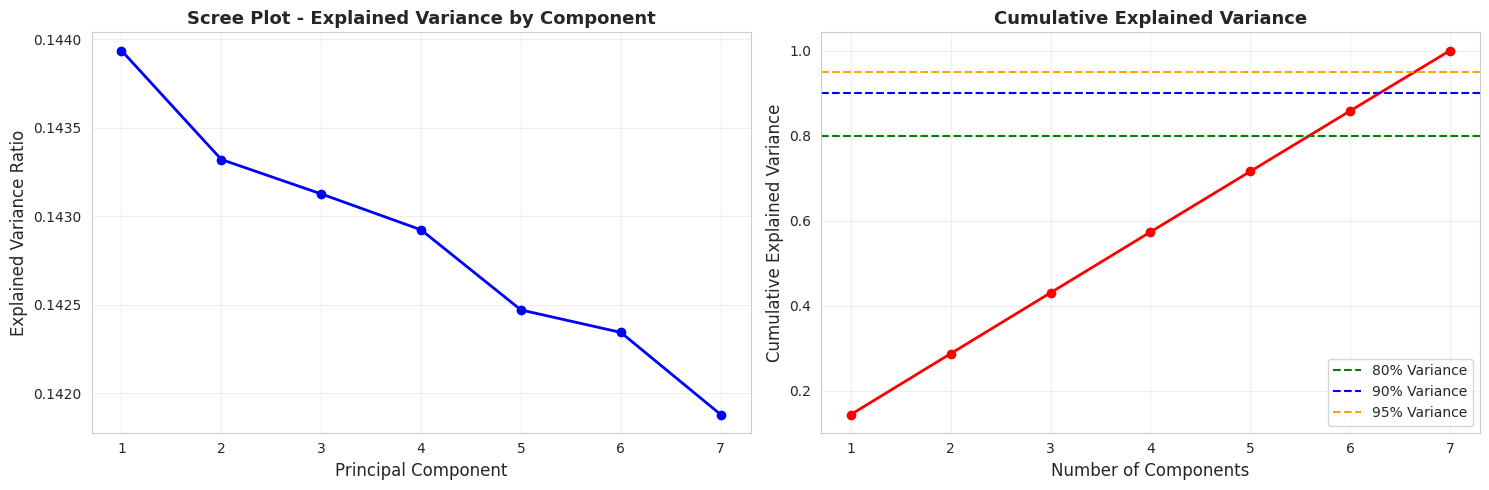

In [59]:
# Plot explained variance
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scree plot
axes[0].plot(range(1, len(explained_variance) + 1), explained_variance, 'bo-', linewidth=2)
axes[0].set_xlabel('Principal Component', fontsize=12)
axes[0].set_ylabel('Explained Variance Ratio', fontsize=12)
axes[0].set_title('Scree Plot - Explained Variance by Component', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Cumulative explained variance
axes[1].plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'ro-', linewidth=2)
axes[1].axhline(y=0.80, color='g', linestyle='--', label='80% Variance')
axes[1].axhline(y=0.90, color='b', linestyle='--', label='90% Variance')
axes[1].axhline(y=0.95, color='orange', linestyle='--', label='95% Variance')
axes[1].set_xlabel('Number of Components', fontsize=12)
axes[1].set_ylabel('Cumulative Explained Variance', fontsize=12)
axes[1].set_title('Cumulative Explained Variance', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [60]:
# Find number of components for different variance thresholds
for threshold in [0.80, 0.90, 0.95]:
    n_components = np.argmax(cumulative_variance >= threshold) + 1
    print(f" {n_components} components explain {threshold*100:.0f}% of variance")

 6 components explain 80% of variance
 7 components explain 90% of variance
 7 components explain 95% of variance


In [61]:
# Apply PCA with optimal components (95% variance)
n_components_optimal = np.argmax(cumulative_variance >= 0.95) + 1
pca = PCA(n_components=n_components_optimal)
X_pca_transformed = pca.fit_transform(X_pca)

print(f" PCA applied with {n_components_optimal} components")
print(f"Total variance explained: {pca.explained_variance_ratio_.sum()*100:.2f}%")


 PCA applied with 7 components
Total variance explained: 100.00%


In [62]:
# Create DataFrame with PCA components
pca_columns = [f'PC{i+1}' for i in range(n_components_optimal)]
df_pca = pd.DataFrame(X_pca_transformed, columns=pca_columns)

In [63]:
# Add PCA components to processed dataframe
for col in pca_columns:
    df_processed[col] = df_pca[col]

In [64]:
# PCA Component Analysis
print("\n Analyzing PCA Components")

# Component loadings
loadings = pd.DataFrame(
    pca.components_.T,
    columns=pca_columns,
    index=[col.replace('scaled_', '') for col in pca_features]
)

print("\n Top Feature Loadings for Each Component:")
for pc in pca_columns[:3]:  # Show first 3 components
    print(f"\n{pc}:")
    print(loadings[pc].abs().sort_values(ascending=False).head())


 Analyzing PCA Components

 Top Feature Loadings for Each Component:

PC1:
course_price              0.549270
course_duration_hours     0.464683
feedback_score            0.429912
time_spent_hours          0.418868
previous_courses_taken    0.330891
Name: PC1, dtype: float64

PC2:
rating                    0.549192
time_spent_hours          0.539639
feedback_score            0.525686
previous_courses_taken    0.285177
enrollment_numbers        0.143780
Name: PC2, dtype: float64

PC3:
enrollment_numbers        0.586103
rating                    0.535241
course_duration_hours     0.402494
course_price              0.294240
previous_courses_taken    0.290277
Name: PC3, dtype: float64


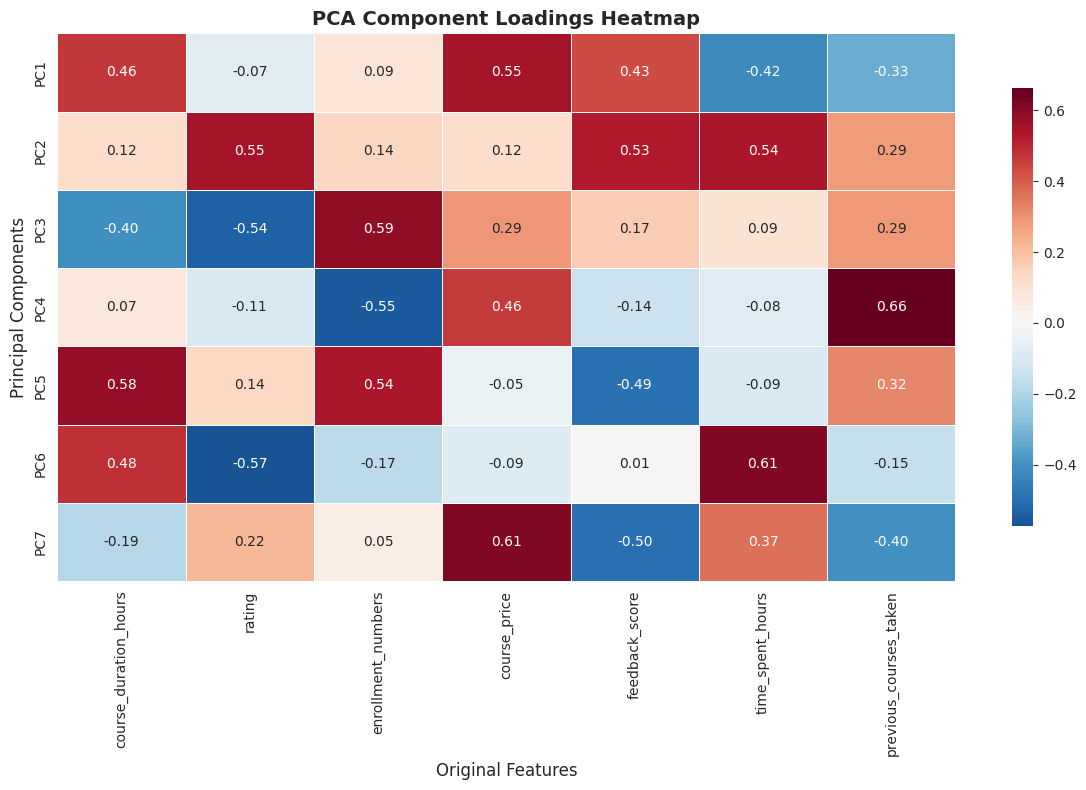

In [65]:
# Visualize loadings heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(loadings.T, cmap='RdBu_r', center=0, annot=True, fmt='.2f',
            cbar_kws={"shrink": 0.8}, linewidths=0.5)
plt.title('PCA Component Loadings Heatmap', fontsize=14, fontweight='bold')
plt.xlabel('Original Features', fontsize=12)
plt.ylabel('Principal Components', fontsize=12)
plt.tight_layout()
plt.show()

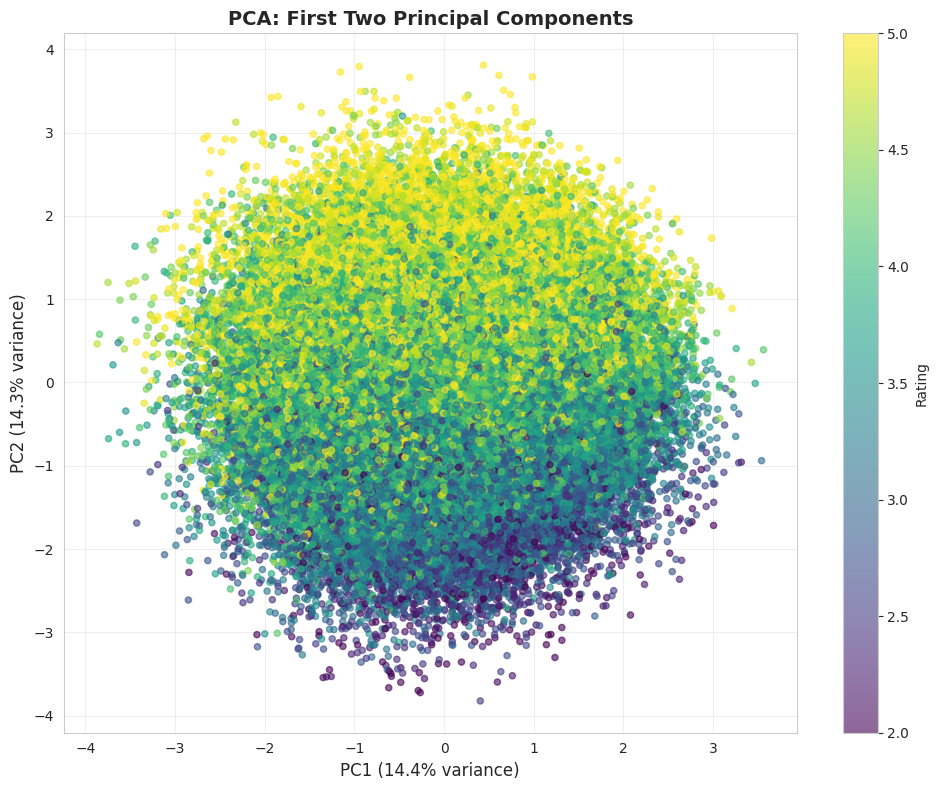

In [66]:
# Visualize PCA results
# 2D PCA plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_processed['rating'],
                     cmap='viridis', alpha=0.6, s=20)
plt.colorbar(scatter, label='Rating')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)', fontsize=12)
plt.title('PCA: First Two Principal Components', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

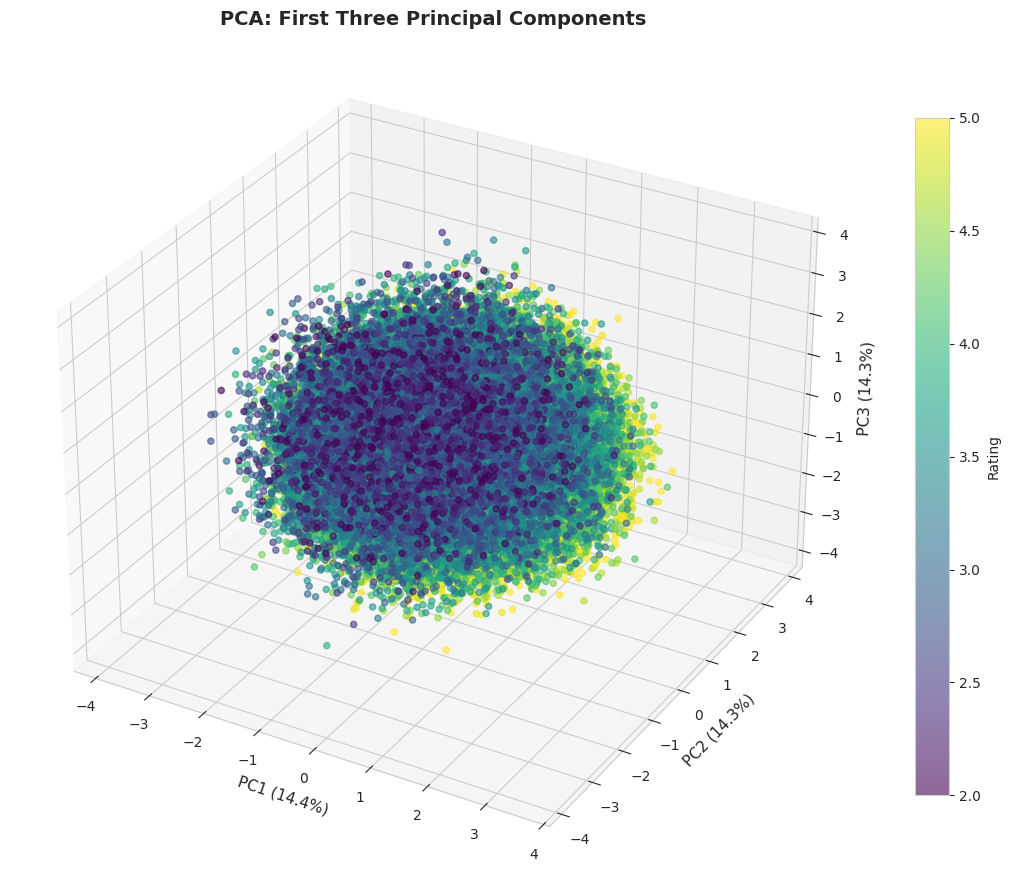

In [67]:
# 3D PCA plot (if we have at least 3 components)
if n_components_optimal >= 3:
    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure(figsize=(12, 9))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'],
                        c=df_processed['rating'], cmap='viridis', alpha=0.6, s=20)

    ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', fontsize=11)
    ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', fontsize=11)
    ax.set_zlabel(f'PC3 ({pca.explained_variance_ratio_[2]*100:.1f}%)', fontsize=11)
    ax.set_title('PCA: First Three Principal Components', fontsize=14, fontweight='bold')

    plt.colorbar(scatter, label='Rating', shrink=0.8)
    plt.tight_layout()
    plt.show()

### CLUSTERING ANALYSIS


 Finding optimal number of clusters using Elbow Method...


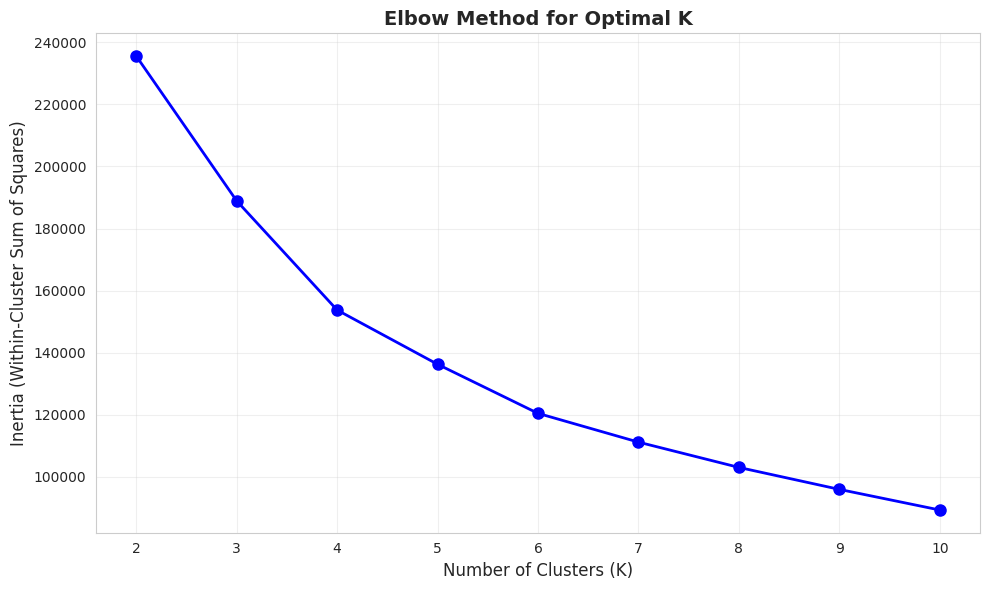

 K-means clustering applied with 4 clusters


In [68]:
# Use first 3 PCA components for clustering
X_cluster = df_pca[['PC1', 'PC2', 'PC3']].values if n_components_optimal >= 3 else df_pca[['PC1', 'PC2']].values

# Elbow method to find optimal clusters
print("\n Finding optimal number of clusters using Elbow Method...")
inertias = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
plt.title('Elbow Method for Optimal K', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('clustering_elbow_method.png', dpi=300, bbox_inches='tight')
plt.show()

# Apply K-means with optimal clusters (let's use 4 as an example)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_processed['cluster'] = kmeans.fit_predict(X_cluster)

print(f" K-means clustering applied with {optimal_k} clusters")



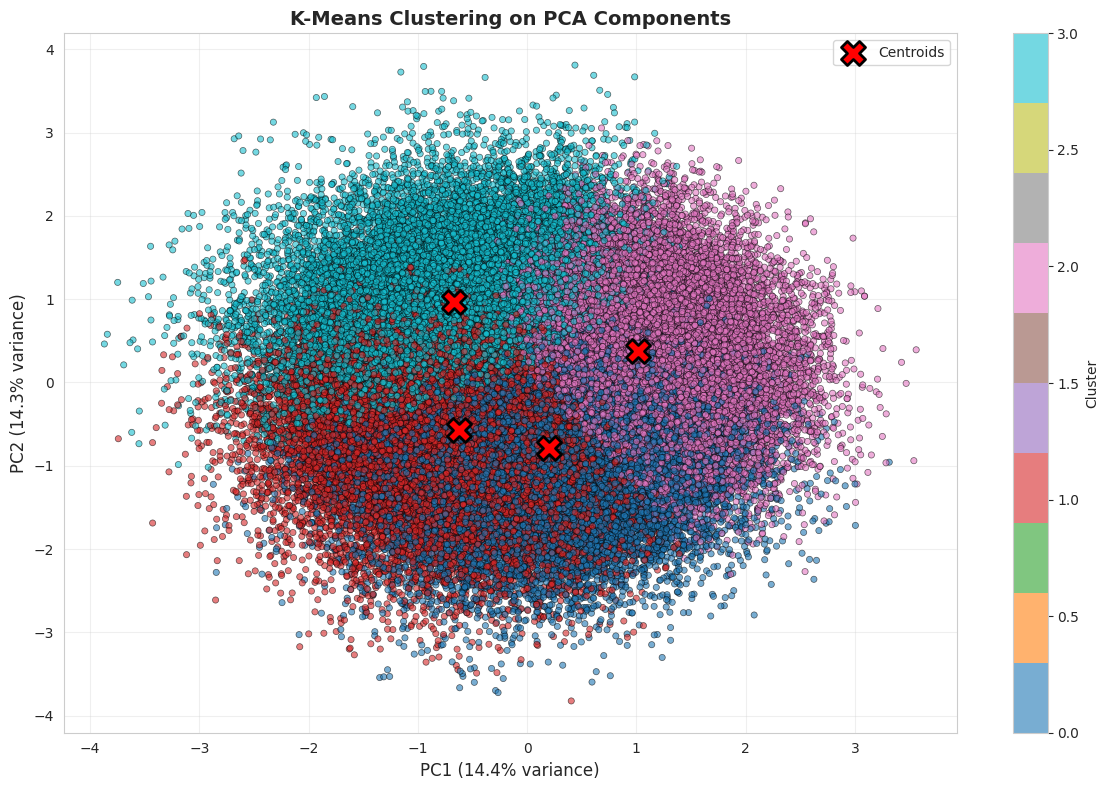

In [69]:
# Visualize clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_processed['cluster'],
                     cmap='tab10', alpha=0.6, s=20, edgecolors='black', linewidths=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           c='red', marker='X', s=300, edgecolors='black', linewidths=2, label='Centroids')
plt.colorbar(scatter, label='Cluster')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)', fontsize=12)
plt.title('K-Means Clustering on PCA Components', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### PREPARE DATA FOR RECOMMENDATION

In [70]:
# Cluster analysis
print("\n Cluster Statistics:")
cluster_stats = df_processed.groupby('cluster')[['rating', 'enrollment_numbers', 'course_price',
                                                  'feedback_score', 'time_spent_hours']].mean()
print(cluster_stats)


 Cluster Statistics:
           rating  enrollment_numbers  course_price  feedback_score  \
cluster                                                               
0        3.244566        31416.777131    301.039892        0.726950   
1        4.116252        16035.412432    169.160017        0.645518   
2        4.235615        23548.471140    329.208920        0.824788   
3        4.218276        29761.090092    241.986782        0.787874   

         time_spent_hours  
cluster                    
0               15.378201  
1               18.523671  
2               16.968800  
3               32.357420  


In [71]:
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics.pairwise import cosine_similarity

In [72]:
# For this dataset, we'll use rating as the interaction metric
# Create pivot table: rows=users, columns=courses, values=ratings
user_item_matrix = df_processed.pivot_table(
    index='user_id',
    columns='course_id',
    values='rating',
    fill_value=0
)

print(f" User-Item matrix ")
print(f"  Shape: {user_item_matrix.shape}")
print(f"  Users: {user_item_matrix.shape[0]}")
print(f"  Courses: {user_item_matrix.shape[1]}")
print(f"  Sparsity: {(1 - (user_item_matrix > 0).sum().sum() / (user_item_matrix.shape[0] * user_item_matrix.shape[1])) * 100:.2f}%")


 User-Item matrix 
  Shape: (43242, 9998)
  Users: 43242
  Courses: 9998
  Sparsity: 99.98%


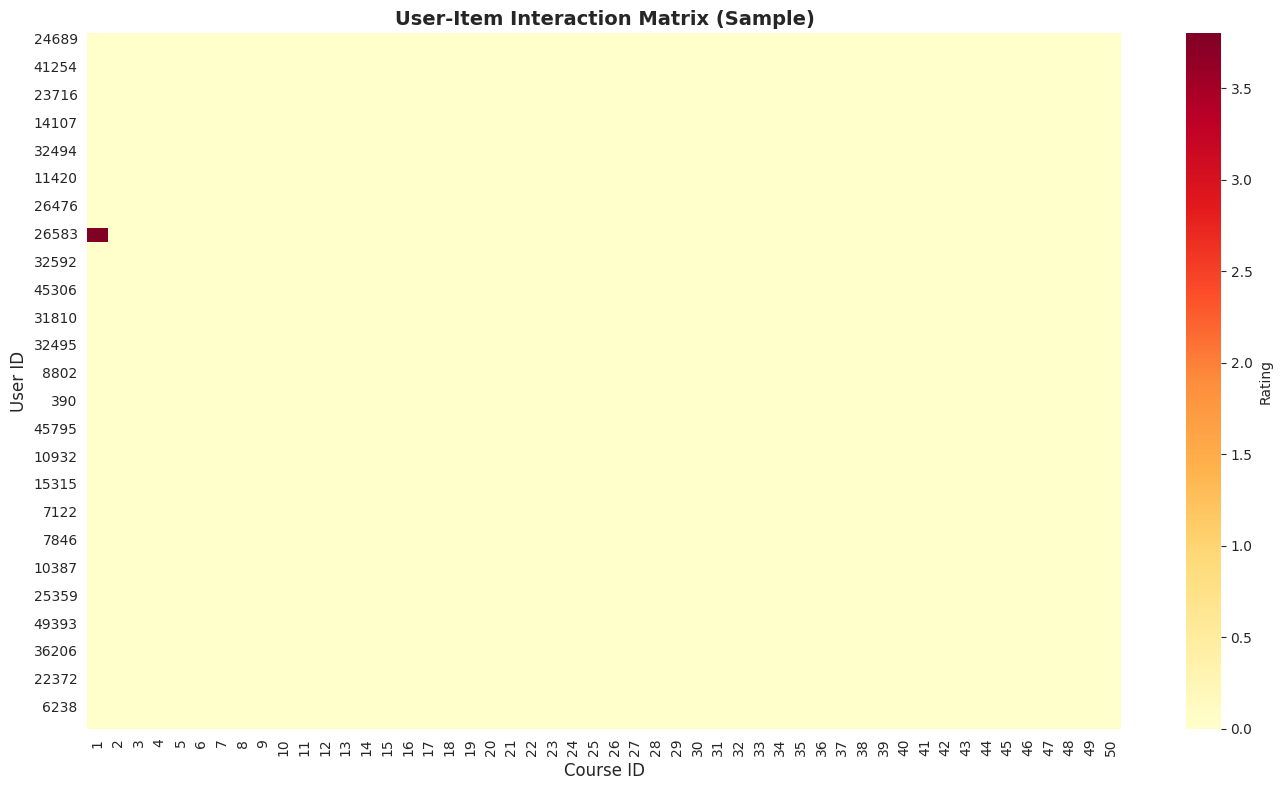

In [73]:
#  Visualize interaction matrix (sample)
plt.figure(figsize=(14, 8))
sample_users = user_item_matrix.sample(n=min(50, len(user_item_matrix)), random_state=42)
sns.heatmap(sample_users.iloc[:, :50], cmap='YlOrRd', cbar_kws={'label': 'Rating'})
plt.title('User-Item Interaction Matrix (Sample)', fontsize=14, fontweight='bold')
plt.xlabel('Course ID', fontsize=12)
plt.ylabel('User ID', fontsize=12)
plt.tight_layout()
plt.show()

In [74]:
df_pca

PC1       PC2       PC3       PC4       PC5       PC6       PC7
0      0.265775  0.677722 -0.685089 -0.194570 -0.527157 -1.116074  0.564882
1     -2.027170  0.834984 -0.256201  0.692721 -0.107368 -0.199168 -1.372317
2     -1.046917  0.924881  0.233505  0.518759 -2.015412  1.010333  1.660255
3      1.110050  0.688287  2.073687 -0.398581  0.183546  0.470834 -0.785840
4     -0.340461 -1.423789  1.602248  0.335874  0.297505  0.390701  1.053878
...         ...       ...       ...       ...       ...       ...       ...
99995  1.145988  0.141280  1.829225 -0.926852 -0.496320 -1.052515  1.210818
99996 -0.444839  1.483670  0.928251 -0.284763  0.213784  1.418570 -1.057378
99997  0.189474  0.719514 -1.337340 -0.493162 -0.689491  0.217491 -2.106629
99998 -0.076078 -1.016166  0.083605  0.876765 -0.910691  0.143161  1.180259
99999  0.777885 -2.492179 -0.736227 -0.448427 -1.298046  1.647632 -0.845500

[100000 rows x 7 columns]

In [75]:
df_pca.mean()


PC1    1.801115e-17
PC2   -2.652545e-17
PC3    1.069367e-17
PC4   -2.404743e-17
PC5    2.174483e-17
PC6   -1.516565e-18
PC7   -1.409539e-17
dtype: float64

In [76]:
df_pca.var()


PC1    1.007557
PC2    1.003251
PC3    1.001891
PC4    1.000471
PC5    0.997307
PC6    0.996419
PC7    0.993174
dtype: float64

### Model 1 CONTENT-BASED KNN on PCA



In [77]:
# Use PCA features (already computed)
X_courses = df_pca.values

knn_model = NearestNeighbors(
    n_neighbors=10,
    metric="cosine",
    algorithm="brute"
)

knn_model.fit(X_courses)

# Map index → course_id
course_index_map = df_processed[['course_id']].reset_index(drop=True)


In [78]:
def recommend_similar_courses(course_id, top_n=5):
    if course_id not in course_index_map['course_id'].values:
        return "Course ID not found"

    idx = course_index_map[course_index_map['course_id'] == course_id].index[0]

    distances, indices = knn_model.kneighbors(
        X_courses[idx].reshape(1, -1),
        n_neighbors=top_n + 1
    )

    # skip itself (distance 0)
    similar_indices = indices[0][1:]

    return course_index_map.iloc[similar_indices]['course_id'].values


In [79]:
def recommend_with_details(course_id, top_n=5):
    rec_ids = recommend_similar_courses(course_id, top_n)

    if isinstance(rec_ids, str):
        return rec_ids

    result = course_catalog[
        course_catalog['course_id'].isin(rec_ids)
    ].copy()

    # Keep the original recommendation order
    result['rank'] = result['course_id'].apply(lambda x: list(rec_ids).index(x))
    result = result.sort_values('rank').drop(columns='rank')

    return result



In [80]:
def recommend_with_scores(course_id, top_n=5):
    if course_id not in course_index_map['course_id'].values:
        return "Course ID not found"

    idx = course_index_map[course_index_map['course_id'] == course_id].index[0]

    distances, indices = knn_model.kneighbors(
        X_courses[idx].reshape(1, -1),
        n_neighbors=top_n + 1
    )

    records = []
    for dist, i in zip(distances[0][1:], indices[0][1:]):
        cid = course_index_map.iloc[i]['course_id']
        records.append({
            'course_id': cid,
            'cosine_similarity': round(1 - dist, 4)
        })

    result = pd.DataFrame(records)
    return result.merge(course_catalog, on='course_id', how='left')


In [81]:
display(recommend_with_details(101))

course_id                          course_name certification_offered  \
4846       4848            Graphic Design with Canva                    No   
7694       7696  Stock Market and Trading Strategies                   Yes   
519         520              Public Speaking Mastery                   Yes   
6466       6468          Game Development with Unity                   Yes   
4805       4807    Mobile App Development with Swift                   Yes   

     difficulty_level    rating  course_price  feedback_score  \
4846         Advanced  4.000000    204.260000        0.744556   
7694     Intermediate  3.873333    294.943333        0.718000   
519          Beginner  3.669231    251.340769        0.715692   
6466         Beginner  4.076471    237.937059        0.818765   
4805         Beginner  4.015385    246.759231        0.760538   

      enrollment_numbers  
4846        27560.555556  
7694        27625.133333  
519         25509.384615  
6466        25913.235294  
4805        31279.153846

In [82]:
recommend_with_scores(101)

course_id  cosine_similarity                          course_name  \
0       4848             0.9787            Graphic Design with Canva   
1       7696             0.9766  Stock Market and Trading Strategies   
2        520             0.9715              Public Speaking Mastery   
3       6468             0.9644          Game Development with Unity   
4       4807             0.9642    Mobile App Development with Swift   

  certification_offered difficulty_level    rating  course_price  \
0                    No         Advanced  4.000000    204.260000   
1                   Yes     Intermediate  3.873333    294.943333   
2                   Yes         Beginner  3.669231    251.340769   
3                   Yes         Beginner  4.076471    237.937059   
4                   Yes         Beginner  4.015385    246.759231   

   feedback_score  enrollment_numbers  
0        0.744556        27560.555556  
1        0.718000        27625.133333  
2        0.715692        25509.384615  
3        0.818765        25913.235294  
4        0.760538        31279.153846

### MODEL 2: USER-BASED COLLABORATIVE FILTERING (KNN)

In [83]:
from sklearn.neighbors import NearestNeighbors

# User-item interaction matrix (already created )
# user_item_matrix: rows=user_id, cols=course_id, values=rating

user_knn = NearestNeighbors(
    metric='cosine',
    algorithm='brute',
    n_neighbors=10
)

user_knn.fit(user_item_matrix)


NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=10)

In [84]:
def recommend_user_based(user_id, top_n=5):
    if user_id not in user_item_matrix.index:
        return "User not found"

    user_vector = user_item_matrix.loc[user_id].values.reshape(1, -1)
    distances, indices = user_knn.kneighbors(user_vector)

    similar_users = user_item_matrix.iloc[indices[0][1:]]
    mean_scores = similar_users.mean(axis=0)

    already_seen = user_item_matrix.loc[user_id] > 0
    recommendations = mean_scores[~already_seen].sort_values(ascending=False)

    return recommendations.head(top_n).index.values


In [85]:
recommend_user_based(101)

array([3060, 2036, 5659, 3725, 8240])

### MODEL 3: MATRIX FACTORIZATION (SVD) - COLLABORATIVE FILTERING


In [86]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Use TruncatedSVD for matrix factorization
# This learns latent features for both users and courses
n_components = 20  # Number of latent features

svd_model = TruncatedSVD(n_components=n_components, random_state=42)
user_features = svd_model.fit_transform(user_item_matrix)
course_features = svd_model.components_.T

# Reconstruct the full matrix (predicted ratings)
predicted_ratings = np.dot(user_features, svd_model.components_)
predicted_ratings_df = pd.DataFrame(
    predicted_ratings,
    index=user_item_matrix.index,
    columns=user_item_matrix.columns
)

print(f"✓ SVD Model trained with {n_components} latent components")
print(f"  User features shape: {user_features.shape}")
print(f"  Course features shape: {course_features.shape}")
print(f"  Explained variance ratio: {svd_model.explained_variance_ratio_.sum():.4f}")

✓ SVD Model trained with 20 latent components
  User features shape: (43242, 20)
  Course features shape: (9998, 20)
  Explained variance ratio: 0.0047


In [87]:
def recommend_svd(user_id, top_n=5):
    """
    Recommend courses using SVD-based collaborative filtering
    """
    if user_id not in predicted_ratings_df.index:
        return "User not found"

    # Get predicted ratings for this user
    user_predictions = predicted_ratings_df.loc[user_id]

    # Filter out courses already taken (rated > 0 in original matrix)
    already_taken = user_item_matrix.loc[user_id] > 0

    # Get recommendations from courses not yet taken
    recommendations = user_predictions[~already_taken].sort_values(ascending=False).head(top_n)

    return recommendations

def recommend_svd_with_details(user_id, top_n=5):
    """
    Get SVD recommendations with full course details
    """
    recommendations = recommend_svd(user_id, top_n)

    if isinstance(recommendations, str):
        return recommendations

    # Get course details
    rec_course_ids = recommendations.index.tolist()
    result = course_catalog[course_catalog['course_id'].isin(rec_course_ids)].copy()

    # Add predicted ratings
    result['predicted_rating'] = result['course_id'].map(recommendations)
    result = result.sort_values('predicted_rating', ascending=False)

    return result[['course_id', 'course_name', 'difficulty_level', 'rating',
                   'predicted_rating', 'course_price', 'certification_offered']]

In [88]:
# Test SVD recommendations
print("SVD Recommendations for User 101:")
print("="*70)
display(recommend_svd_with_details(101, top_n=5))

print("\nRaw predicted scores:")
print(recommend_svd(101, top_n=5))

SVD Recommendations for User 101:


course_id                           course_name difficulty_level  \
4333       4335      DevOps and Continuous Deployment         Beginner   
8556       8558     Fundamentals of Digital Marketing     Intermediate   
8262       8264  Networking and System Administration         Beginner   
6884       6886             Advanced Machine Learning         Beginner   
4266       4268      DevOps and Continuous Deployment         Beginner   

        rating  predicted_rating  course_price certification_offered  
4333  4.204348          0.036722    262.901739                   Yes  
8556  4.120000          0.031064    265.955000                   Yes  
8262  4.036842          0.023865    293.228947                   Yes  
6884  3.994737          0.023604    271.360526                   Yes  
4266  4.015789          0.021553    265.389474                   Yes


Raw predicted scores:
course_id
4335    0.036722
8558    0.031064
8264    0.023865
6886    0.023604
4268    0.021553
Name: 101, dtype: float64


# Model 4 -Hybrid Recommendation (CF + CBF)

In [103]:
def cbf_user_score(user_id):
    # user trained global objects
    global user_item_matrix, knn_model, X_courses, course_index_map

    if user_id not in user_item_matrix.index:
        return None

    # Get courses the user has already rated
    rated_courses = user_item_matrix.loc[user_id][user_item_matrix.loc[user_id] > 0].index.tolist()

    if not rated_courses:
        # If user hasn't rated any courses, return zeros for all courses
        return pd.Series(0.0, index=user_item_matrix.columns)

    all_cbf_scores = {} #stores similarity scores for each course

    for course_id in rated_courses: # user liked
        if course_id not in course_index_map['course_id'].values:
            continue #Skip if course not found in PCA data

        # Get the index of the course in X_courses (PCA features)
        idx = course_index_map[course_index_map['course_id'] == course_id].index[0]

        # Get similar courses and their distances/similarities
        #using cosine distance
        distances, indices = knn_model.kneighbors(
            X_courses[idx].reshape(1, -1),
            n_neighbors=min(20, len(X_courses)) # Get more neighbors for better aggregation
        )

        # Iterate through neighbors (excluding the course itself if it's included)
        for dist, i in zip(distances[0], indices[0]):
            similar_course_id = course_index_map.iloc[i]['course_id']#Get actual course id
            similarity = 1 - dist # Convert distance to similarity

            # Aggregate scores: sum up similarities for each course.
            all_cbf_scores[similar_course_id] = all_cbf_scores.get(similar_course_id, 0) + similarity

    # Convert dict to Series,all course exists fill missing with 0
    cbf_scores_series = pd.Series(all_cbf_scores).reindex(user_item_matrix.columns, fill_value=0.0)

    #Don’t recommend already taken courses
    for course_id in rated_courses:
        if course_id in cbf_scores_series.index:
            cbf_scores_series[course_id] = 0

    return cbf_scores_series

def hybrid_recommend(user_id, top_n=5, alpha=0.7):
    if user_id not in predicted_ratings_df.index:#user validation
        return "User not found"

    # CF scores from SVD model @ svd predicted ratings
    cf_scores = predicted_ratings_df.loc[user_id]

    # CBF scores
    cbf_scores = cbf_user_score(user_id) # Call the newly defined function
    if cbf_scores is None:
        return "CBF scores not available or user has not rated any courses"

    # Ensure both series have the same index for consistent normalization and combination
    common_index = cf_scores.index.intersection(cbf_scores.index)
    cf_scores_aligned = cf_scores.loc[common_index]
    cbf_scores_aligned = cbf_scores.loc[common_index]

    # Normalize scores to a 0-1 range
    cf_norm = (cf_scores_aligned - cf_scores_aligned.min()) / (cf_scores_aligned.max() - cf_scores_aligned.min() + 1e-9)
    cbf_norm = (cbf_scores_aligned - cbf_scores_aligned.min()) / (cbf_scores_aligned.max() - cbf_scores_aligned.min() + 1e-9)

    # Combine normalized scores
    hybrid_score = alpha * cf_norm + (1 - alpha) * cbf_norm

    # Remove courses already taken by the user
    already_taken = (user_item_matrix.loc[user_id] > 0).loc[common_index]
    hybrid_score = hybrid_score[~already_taken]

    # Get top N recommendations
    top_courses = hybrid_score.sort_values(ascending=False).head(top_n)

    # Retrieve full course details for the recommended courses
    #fetch couse details,add hybrid score and final recommendations
    result = course_catalog[course_catalog['course_id'].isin(top_courses.index)].copy()
    result['hybrid_score'] = result['course_id'].map(top_courses)
    result = result.sort_values('hybrid_score', ascending=False)

    return result

In [105]:
print("HYBRID Recommendations for User")#recommendation
display(hybrid_recommend(user_id=29, top_n=5, alpha=0.7))

HYBRID Recommendations for User


course_id                                course_name  \
3656       3658          Mobile App Development with Swift   
4098       4100             Fitness and Nutrition Coaching   
194         195                 Cloud Computing Essentials   
9303       9305                    Public Speaking Mastery   
5305       5307  Blockchain and Decentralized Applications   

     certification_offered difficulty_level    rating  course_price  \
3656                   Yes         Beginner  4.030435    227.745217   
4098                   Yes         Beginner  4.313333    278.888667   
194                    Yes         Beginner  4.318182    302.638182   
9303                   Yes         Beginner  4.376471    271.800588   
5305                   Yes         Beginner  4.020000    246.949500   

      feedback_score  enrollment_numbers  hybrid_score  
3656        0.747043        28113.173913      0.700000  
4098        0.745933        24005.400000      0.699568  
194         0.753727        27297.545455      0.594858  
9303        0.812529        21316.058824      0.576389  
5305        0.765800        22823.850000      0.536557

# Model_5 content-based filtering with TF-IDF

In [91]:
#Build unique course table by course_name
course_df = (
    df_processed.drop_duplicates(subset=['course_name'])
    [['course_id', 'course_name', 'difficulty_level',
      'certification_offered', 'rating', 'experience_level']]
    .reset_index(drop=True)
)


In [92]:
#creating a text feature
#Combine text into one string per course
course_df['course_text'] = (
    course_df['course_name'].astype(str) + " " +
    course_df['difficulty_level'].astype(str) + " " +
    course_df['certification_offered'].astype(str) + " " +
    course_df['experience_level'].astype(str)
)


In [93]:
#using tf and idf
#Converts text to numeric vectors, Removes common words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
tfidf = TfidfVectorizer(stop_words='english', max_features=2000)
#shape=courses x words
tfidf_matrix = tfidf.fit_transform(course_df['course_text'])



In [94]:
# Mapping Course Name to Index for TF-IDF
course_index = pd.Series(
    course_df.index,
    index=course_df['course_name']
)


In [95]:
# TF-IDF Content-Based Recommender Function
def recommend_tfidf(course_id, top_n=5):
    # Step 1: get course_name from original data
    row = df_processed[df_processed['course_id'] == course_id]#selected course
    if row.empty:
        return "Course ID not found in dataset"

    course_name = row['course_name'].iloc[0]#extract course name
    print(f"Recommendations for course: '{course_name}' (ID: {course_id})\n") # Added print statement

    # Step 2: find that course in TF-IDF index
    if course_name not in course_index:
        return "Course text not indexed"

    idx = course_index[course_name]

    # Step 3: cosine similarity with all courses
    cosine_scores = linear_kernel(
        tfidf_matrix[idx:idx+1],
        tfidf_matrix
    ).flatten()

    top_indices = cosine_scores.argsort()[::-1][1:top_n+1]#sort by similarity

    return course_df.iloc[top_indices][
        ['course_id', 'course_name', 'difficulty_level', 'rating']
    ]

In [100]:
# Test TF-IDF Recommendation Function
recommend_tfidf(course_id=5, top_n=5)

Recommendations for course: 'Fundamentals of Digital Marketing' (ID: 5)



course_id                                course_name difficulty_level  \
3        3708            Project Management Fundamentals         Beginner   
9        3434             Fitness and Nutrition Coaching     Intermediate   
7        4298  Blockchain and Decentralized Applications     Intermediate   
11        534              Photography and Video Editing         Advanced   
1        1928            Cybersecurity for Professionals         Beginner   

    rating  
3      3.1  
9      4.2  
7      4.4  
11     4.1  
1      4.3